In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from copy import deepcopy
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, roc_curve

font = {'size'   : 15}
plt.matplotlib.rc('font', **font)

# Iris dataset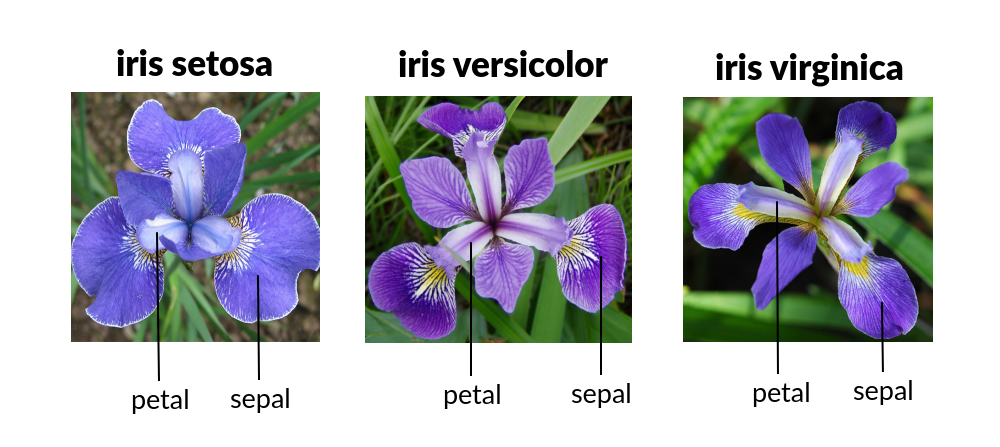

* petal - лепесток
* sepal - чашелистик

In [ ]:
df_X, df_y = load_iris(return_X_y=True, as_frame=True)
df_X['class'] = df_y
df_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


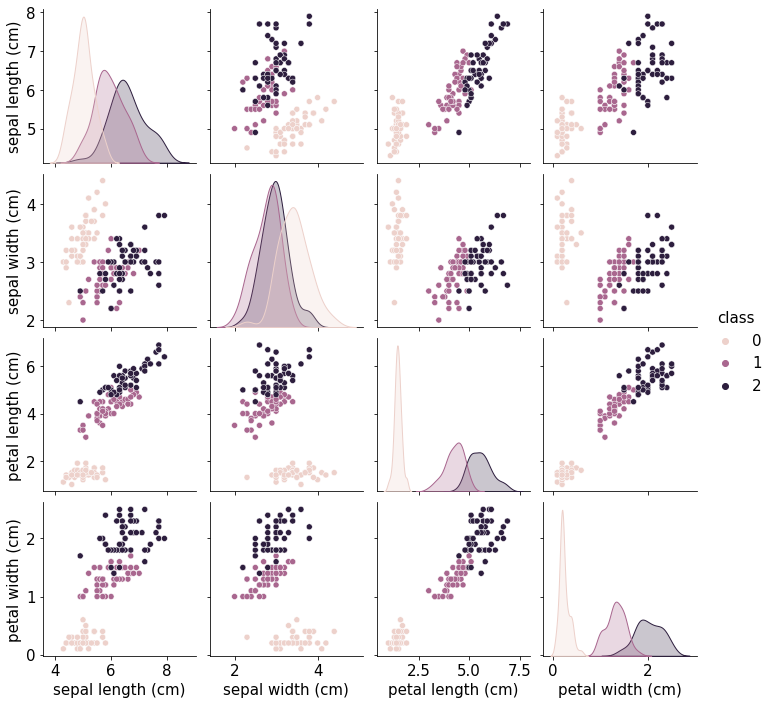

In [ ]:
sns.pairplot(df_X, hue='class')

## Data normalisation

In [ ]:
X = df_X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
print(X.shape)
print(X[:6, :])  # print 6 upper rows

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]


In [ ]:
def normalize(X_in, a=0, b=1):
    # normalising from [X_min, X_max] to [a, b]
    # task : implement a function that gets X_in as vector/matrix and returns X_out in a desired range
    # hint : all functions you need are min - np.min(X_in), max - np.max(X_in)
    return (b - a) * (X_in - np.min(X_in)) / (np.max(X_in) - np.min(X_in)) + a

In [ ]:
X_norm = np.stack(list([(normalize(X[:, i])) for i in range(4)])).T
print(X_norm.shape)
print(X_norm[:6, :])

(150, 4)
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]]


In [ ]:
df_X_norm = pd.DataFrame()
df_X_norm['sepal length (norm)'] = X_norm[:, 0]
df_X_norm['sepal width (norm)'] = X_norm[:, 1]
df_X_norm['petal length (norm)'] = X_norm[:, 2]
df_X_norm['petal width (norm)'] = X_norm[:, 3]
df_X_norm['class'] = df_X['class']
df_X_norm.head()

,sepal length (norm),sepal width (norm),petal length (norm),petal width (norm),class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [ ]:
df_X_norm.describe()

,sepal length (norm),sepal width (norm),petal length (norm),petal width (norm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,1.000000
std,0.230018,0.181611,0.299203,0.317599,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


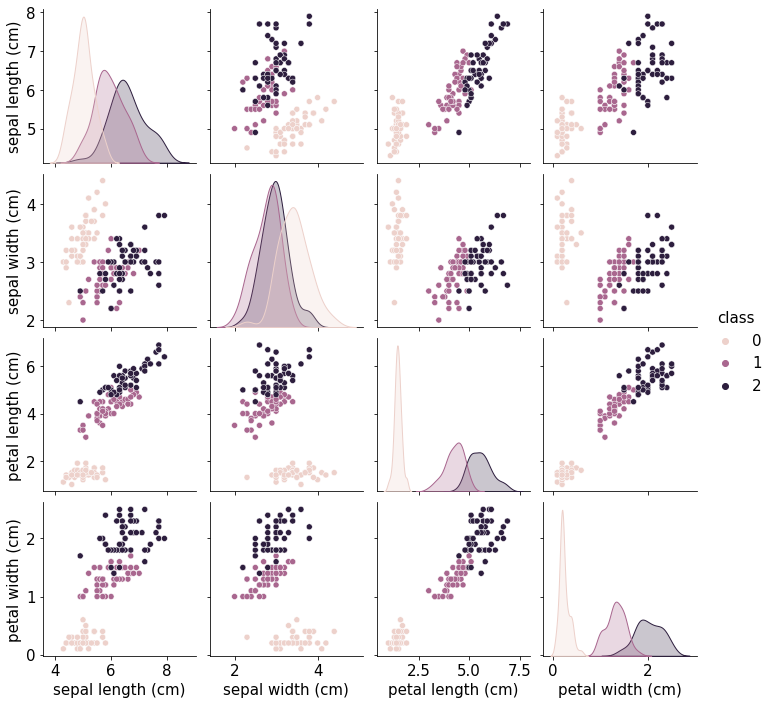

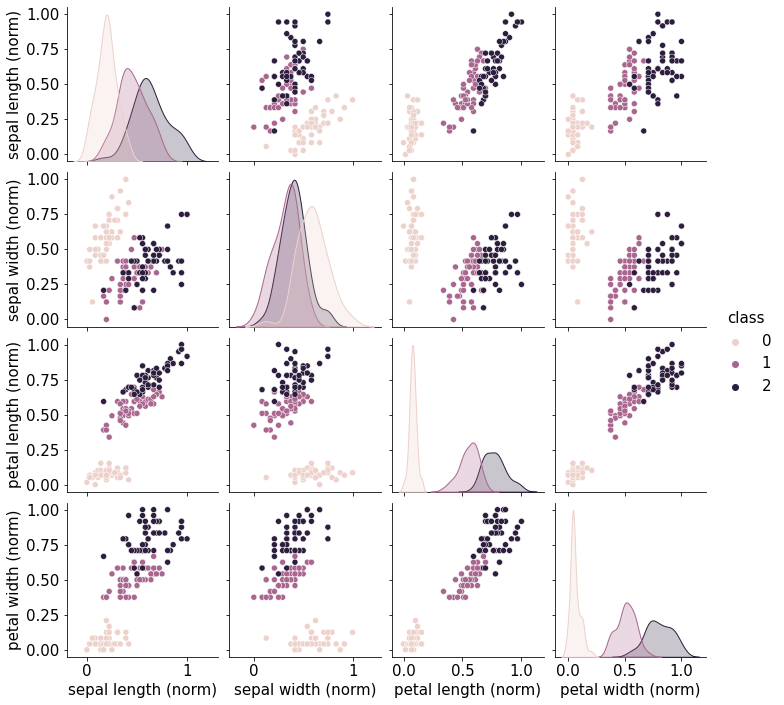

In [ ]:
sns.pairplot(df_X, hue='class')
sns.pairplot(df_X_norm, hue='class')

## 2 classes

In [ ]:
mask = df_y != 2
print(mask.values)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


In [ ]:
print(X.shape, X[mask].shape)

(150, 4) (100, 4)


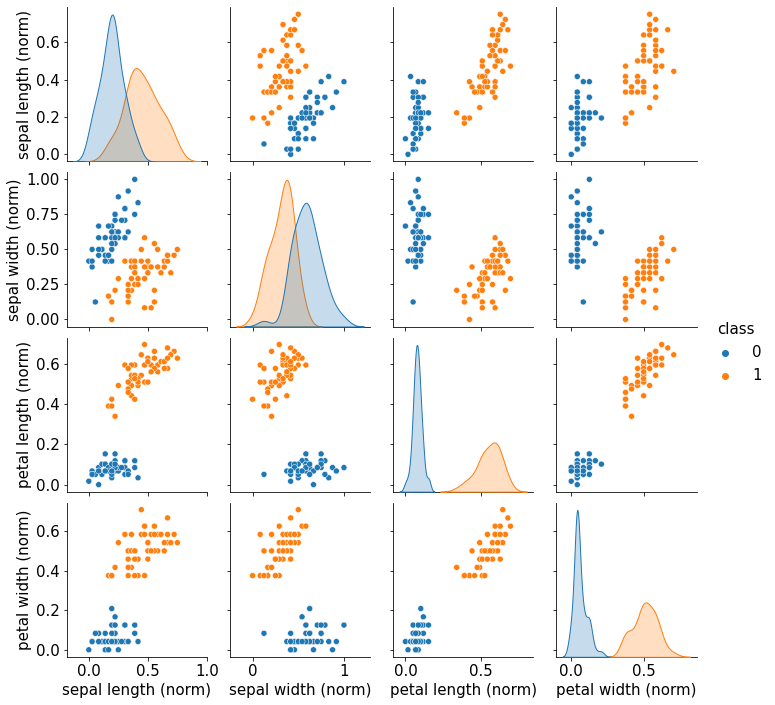

In [ ]:
sns.pairplot(df_X_norm[mask], hue='class')

In [ ]:
X_norm = np.stack(list([(normalize(X[mask][:, i])) for i in range(4)])).T
print(X_norm.shape)
print(X_norm[:6, :])

(100, 4)
[[0.2962963  0.625      0.09756098 0.05882353]
 [0.22222222 0.41666667 0.09756098 0.05882353]
 [0.14814815 0.5        0.07317073 0.05882353]
 [0.11111111 0.45833333 0.12195122 0.05882353]
 [0.25925926 0.66666667 0.09756098 0.05882353]
 [0.40740741 0.79166667 0.17073171 0.17647059]]


In [ ]:
df_X_norm = pd.DataFrame()
df_X_norm['sepal length (norm)'] = X_norm[:, 0]
df_X_norm['sepal width (norm)'] = X_norm[:, 1]
df_X_norm['petal length (norm)'] = X_norm[:, 2]
df_X_norm['petal width (norm)'] = X_norm[:, 3]
df_X_norm['class'] = df_X['class']
df_X_norm.describe()

,sepal length (norm),sepal width (norm),petal length (norm),petal width (norm),class
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.433704,0.457917,0.453902,0.403529,0.500000
std,0.237666,0.199475,0.353548,0.332443,0.502519
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.259259,0.333333,0.121951,0.058824,0.000000
50%,0.407407,0.437500,0.353659,0.411765,0.500000
75%,0.592593,0.583333,0.810976,0.705882,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


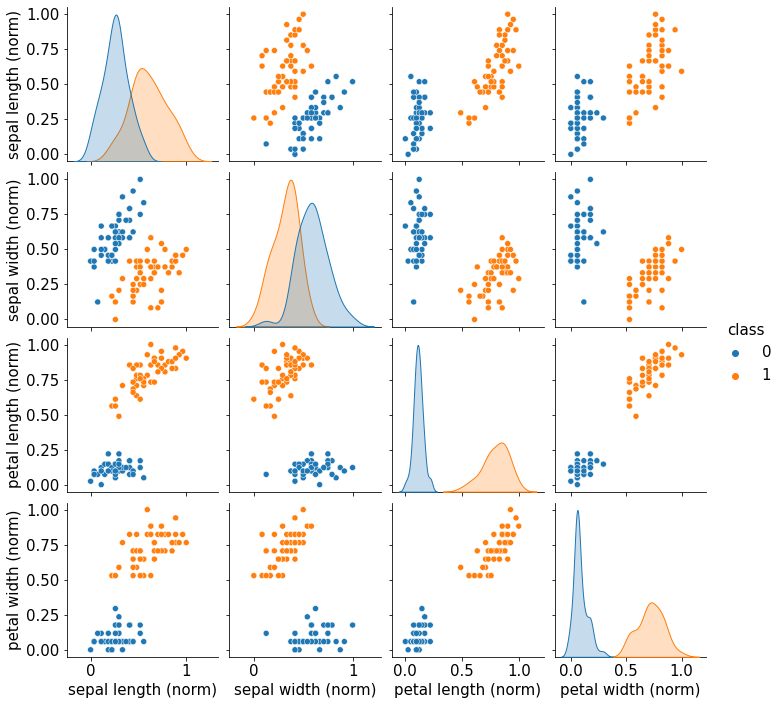

In [ ]:
sns.pairplot(df_X_norm, hue='class')

## Adding 1 in feature vector

We have 
$$
\mathbf{X} \in \mathbb{R}^{n_{\mathrm{features}} \times n_{\mathrm{objects}}}
$$
where $n_{\mathrm{features}} = 4$ and $n_{\mathrm{objects}} = 100$. Lets add 1 more feature column for the bias, so we'll have:
$$
\mathbf{X} \in \mathbb{R}^{(n_{\mathrm{features}} + 1) \times n_{\mathrm{objects}}}
$$

In [ ]:
X = df_X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values[mask]
print(X.shape)
print(X[:6, :])

(100, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]


In [ ]:
X_norm = np.stack(list([(normalize(X[:, i])) for i in range(4)])).T
print(X_norm.shape)
print(X_norm[:6, :])

(100, 4)
[[0.2962963  0.625      0.09756098 0.05882353]
 [0.22222222 0.41666667 0.09756098 0.05882353]
 [0.14814815 0.5        0.07317073 0.05882353]
 [0.11111111 0.45833333 0.12195122 0.05882353]
 [0.25925926 0.66666667 0.09756098 0.05882353]
 [0.40740741 0.79166667 0.17073171 0.17647059]]


In [ ]:
def add_ones(X_in):
    X_out = np.ones((X_in.shape[0], X_in.shape[1] + 1))
    X_out[:, :-1] = X_in
    return X_out

In [ ]:
X = add_ones(X)
print(X.shape)
print(X[:6, :])

(100, 5)
[[5.1 3.5 1.4 0.2 1. ]
 [4.9 3.  1.4 0.2 1. ]
 [4.7 3.2 1.3 0.2 1. ]
 [4.6 3.1 1.5 0.2 1. ]
 [5.  3.6 1.4 0.2 1. ]
 [5.4 3.9 1.7 0.4 1. ]]


In [ ]:
X_norm = add_ones(X_norm)
print(X_norm.shape)
print(X_norm[:6, :])

(100, 5)
[[0.2962963  0.625      0.09756098 0.05882353 1.        ]
 [0.22222222 0.41666667 0.09756098 0.05882353 1.        ]
 [0.14814815 0.5        0.07317073 0.05882353 1.        ]
 [0.11111111 0.45833333 0.12195122 0.05882353 1.        ]
 [0.25925926 0.66666667 0.09756098 0.05882353 1.        ]
 [0.40740741 0.79166667 0.17073171 0.17647059 1.        ]]


## Train/test split

In [ ]:
y = df_y[mask].values
y[y == 0] = -1
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.shape)
print(y_train)
print(y_test.shape)
print(y_test)

(80,)
[ 1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1
 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1
  1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1
  1  1 -1  1  1 -1  1  1]
(20,)
[ 1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1]


## Probability
$$
p^+_i = \frac{1}{1+\exp\left(x_i^\mathrm{T} w\right)}
$$
where
* $x_i \in \mathbb{R}^{n_{\mathrm{features}} + 1}$ (or $x_i \in [0, 1]^{n_{\mathrm{features}} + 1}$ if normalized), 
* $w \in \mathbb{R}^{n_{\mathrm{features}} + 1}$,
* $p^+_i \in (0, 1)$

In [ ]:
w = np.random.uniform(low=-1, high=1, size=5)
print(w)

[ 0.70543185 -0.06392908  0.6754288  -0.82595242  0.59869488]


In [ ]:
def p(X_in, w):
    # task : implement probability function described above
    # hint 1 : np.dot - for scalar product and matrix multiplication
    # hint 2 : e^a = np.exp(a)
    return 1 / (1 + np.exp( - np.dot(X_in, w)))

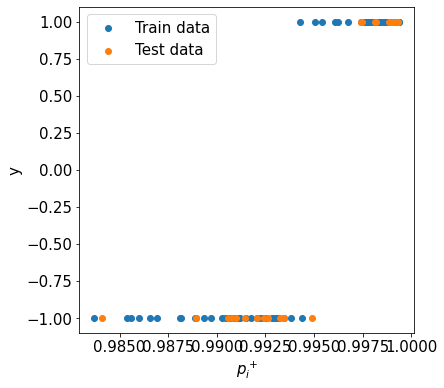

In [ ]:
p_train = p(X_train, w)
p_test = p(X_test, w)

plt.figure(figsize=(6, 6))
plt.scatter(p_train, y_train, label='Train data')
plt.scatter(p_test, y_test, label='Test data')
plt.xlabel(r'$p^+_i$')
plt.ylabel(r'y')
plt.legend()
plt.show()

## Margin function

$$
M_i = y_i\cdot x_i^\mathrm{T} w
$$
where
* $x_i \in \mathbb{R}^{n_{\mathrm{features}} + 1}$ (or $x_i \in [0, 1]^{n_{\mathrm{features}} + 1}$ if normalized), 
* $y_i\in \{-1, 1\}$,
* $w \in \mathbb{R}^{n_{\mathrm{features}} + 1}$,
* $M_i \in \mathbb{R}$

In matrix form
$$
\mathbf{M} = \mathbf{y} \cdot \mathbf{X}^\mathrm{T} \mathbf{w}
$$
where 
* $\cdot$ - [Hadamart product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) (or just element-wise product)
* $\mathbf{X} \in \mathbb{R}^{(n_{\mathrm{features}} + 1) \times n_{\mathrm{objects}}}$
* $\mathbf{y} \in \{-1, 1\}^{n_{\mathrm{objects}}}$
* $\mathbf{w} \in \mathbb{R}^{n_{\mathrm{features}} + 1}$
* $\mathbf{M} = \begin{pmatrix}
M_1\\ 
...\\ 
M_{n_{\mathrm{objects}}}
\end{pmatrix} \in \mathbb{R}^{n_{\mathrm{objects}}}$

In [ ]:
w = np.random.uniform(low=-1, high=1, size=5)
print(w)

[-0.73451145  0.89727827  0.22353296  0.22915733 -0.1049853 ]


In [ ]:
def margin(y_in, X_in, w):
    # task : implement margin function described above
    # hint 1 : np.dot - for scalar product and matrix multiplication
    # hint 2 : * - Adamar product
    return y_in * np.dot(X_in, w)

In [ ]:
M_train = margin(y_train, X_train, w)
print(M_train.shape)
print(M_train)

(80,)
[-0.47551856 -0.31202494  0.27748077  0.12912091 -0.85120214 -0.08328619
  0.27772856 -0.45285062  0.5643136  -1.05016426  0.17640994  0.2536699
 -0.08875783  0.51492112 -0.74698643  0.10029292 -0.17678029 -0.94028409
  0.59218107  0.1897061   0.45774665  0.54139787  0.34566553 -0.38603853
  0.40283999  0.03728963 -0.93510115  0.68222354 -1.41475264  0.30274774
  0.10935006  0.32104443  0.32882641  0.30857656  0.37595109 -0.5603127
  0.05129851 -0.51351925  0.66790002 -0.70956623 -0.3541325  -0.56493174
 -0.99494296  0.14192147 -1.00384981 -0.79685792  0.03785207 -1.33530978
 -0.46419362 -0.79775305 -0.94725438  0.98720676 -1.02449774  0.29683549
 -0.68512608 -0.58380746 -0.95656078 -0.11261124 -0.55885513 -0.3091947
 -0.61197299 -0.029878    0.13802776  0.28241445  0.65347899 -0.95250417
  0.10410173  0.34947434  0.39539071 -1.38721786 -0.54459846 -0.94465534
 -0.85030847 -0.79573304  0.59476352 -0.97146332 -0.88108962  0.46196762
 -0.86310757 -0.5849338 ]


In [ ]:
M_test = margin(y_test, X_test, w)
print(M_test.shape)
print(M_test)

(20,)
[-0.58273285 -0.88902189 -0.08187099  0.55711211 -0.07503928  0.41911668
 -0.01582822 -0.88983212  0.37028663  0.35174215  0.43328991  0.44559343
 -0.74753228  0.01745194 -0.55334095  0.18856317 -1.19350554 -0.82714494
  0.60294358  0.59363865]


## Sigmoid function

$$
\sigma(M_i) = \frac{1}{1+\exp\left(-M_i\right)}
$$

$\sigma : \mathbb{R} → (0, 1)$ 

In [ ]:
def sigmoid(M):
    # task : implement sigmoid function described above
    return 1 / (1 + np.exp(-M))

In [ ]:
print(sigmoid(M_train))

[0.38331091 0.42262055 0.56892849 0.53223545 0.29918074 0.47919048
 0.56898926 0.38868322 0.63745004 0.25919356 0.54398847 0.56307958
 0.4778251  0.62595939 0.3214783  0.52505223 0.45591966 0.28084296
 0.64386543 0.5472848  0.61247948 0.63213754 0.58556609 0.40467131
 0.59936981 0.50932133 0.28189095 0.66423479 0.19548552 0.57511409
 0.52731031 0.57957877 0.5814738  0.57653778 0.59289619 0.36347511
 0.51282182 0.37436889 0.66103278 0.32969469 0.41238066 0.36240712
 0.26993686 0.53542094 0.26818518 0.31069804 0.50946189 0.20828242
 0.38599145 0.31050637 0.27943732 0.72853585 0.26415222 0.57366874
 0.33511818 0.35805697 0.27756731 0.4718769  0.3638124  0.42331131
 0.35160926 0.49253105 0.53445226 0.57013806 0.65779402 0.27838149
 0.52600195 0.5864901  0.59757973 0.19985228 0.36711851 0.27996095
 0.29936815 0.310939   0.64445737 0.27458893 0.29295203 0.61348085
 0.29669049 0.35779812]


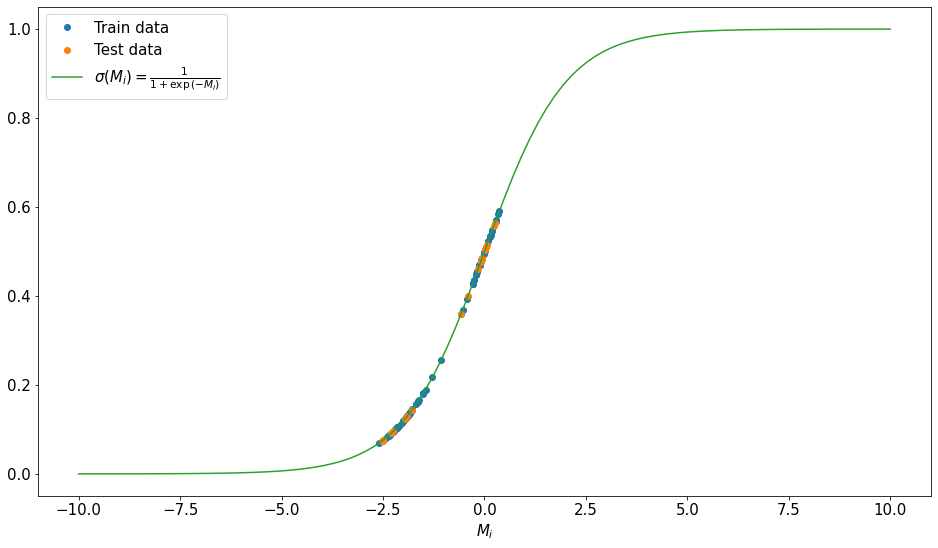

In [ ]:
w = np.random.uniform(low=-1, high=1, size=5)
M_train = margin(y_train, X_train, w)
M_test = margin(y_test, X_test, w)

plt.figure(figsize=(16, 9))
plt.plot(M_train, sigmoid(M_train), 'o', label='Train data')
plt.plot(M_test, sigmoid(M_test), 'o', label='Test data')
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x), '-', label=r'$\sigma(M_i) = \frac{1}{1+\exp\left(-M_i\right)}$')
plt.xlabel(r'$M_i$')
plt.legend()
plt.show()

[-0.95418327  0.17177552  0.29152141 -0.46484526 -0.57952104]


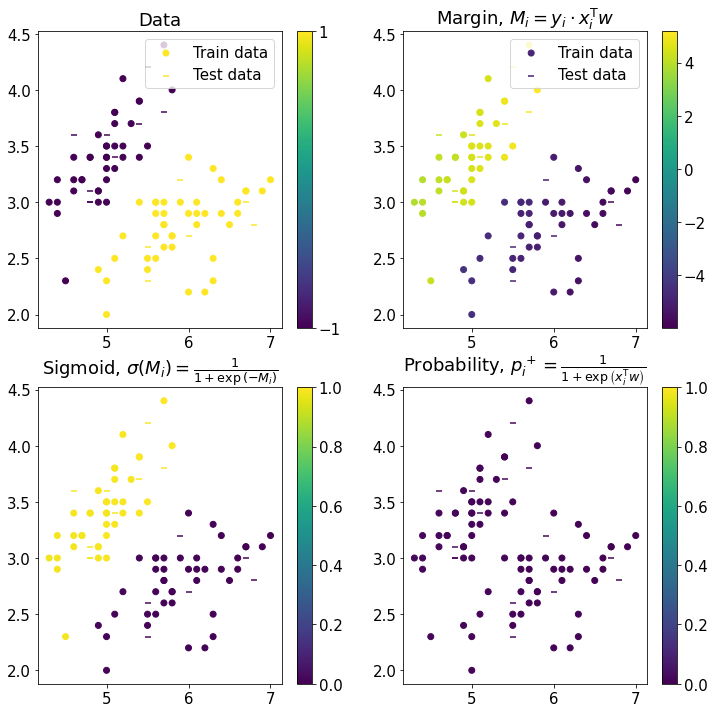

In [ ]:
w = np.random.uniform(low=-1, high=1, size=5)
print(w)
M_train = margin(y_train, X_train, w)
M_test = margin(y_test, X_test, w)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

ax1.set_title('Data')
sc1 = ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train data')
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='_', label='Test data')
fig.colorbar(sc1, ax=ax1, ticks=[-1, 1])
ax1.legend()

ax2.set_title(r'Margin, $M_i = y_i\cdot x_i^\mathrm{T} w$')
sc2 = ax2.scatter(X_train[:, 0], X_train[:, 1], c=M_train, marker='o', label='Train data')
ax2.scatter(X_test[:, 0], X_test[:, 1], c=M_test, marker='_', label='Test data')
fig.colorbar(sc2, ax=ax2)
ax2.legend()

ax3.set_title(r'Sigmoid, $\sigma(M_i) = \frac{1}{1+\exp\left(-M_i\right)}$')
sc3 = ax3.scatter(X_train[:, 0], X_train[:, 1], c=sigmoid(M_train), vmin=0, vmax=1, marker='o', label='Train data')
ax3.scatter(X_test[:, 0], X_test[:, 1], c=sigmoid(M_test), vmin=0, vmax=1, marker='_', label='Test data')
fig.colorbar(sc3, ax=ax3)

ax4.set_title(r'Probability, $p^+_i = \frac{1}{1+\exp\left(x_i^\mathrm{T} w\right)}$')
sc4 = ax4.scatter(X_train[:, 0], X_train[:, 1], c=p(X_train, w), vmin=0, vmax=1, marker='o', label='Train data')
ax4.scatter(X_test[:, 0], X_test[:, 1], c=p(X_test, w), vmin=0, vmax=1, marker='_', label='Test data')
fig.colorbar(sc4, ax=ax4)

## Loss function

$$
L_{\mathrm{LogReg}}(\mathbf{M}) = \frac{1}{n_{\mathrm{objects}}} \sum_i^{n_{\mathrm{objects}}} \log(1 + \exp\left(-M_i\right))
$$

$L_{\mathrm{LogReg}} : \mathbb{R}^{n_{\mathrm{objects}}} → \mathbb{R}^+$

In [ ]:
def loss(M):
    # task : implement logistic regression loss function
    # hint 1 : log(a) = np.log(a)
    # hint 2 : sum(arr) = np.sum(arr)
    return np.mean(np.log(1 + np.exp(-M)))

In [ ]:
w = np.random.uniform(low=-1, high=1, size=5)
print(w)
M_train = margin(y_train, X_train, w)
M_test = margin(y_test, X_test, w)
print(f'Train loss: {loss(M_train)}')
print(f'Test loss: {loss(M_test)}')

[-0.12827469 -0.16729784 -0.11886614 -0.54938062  0.46585039]
Train loss: 1.2511906775404487
Test loss: 1.0558607693859123


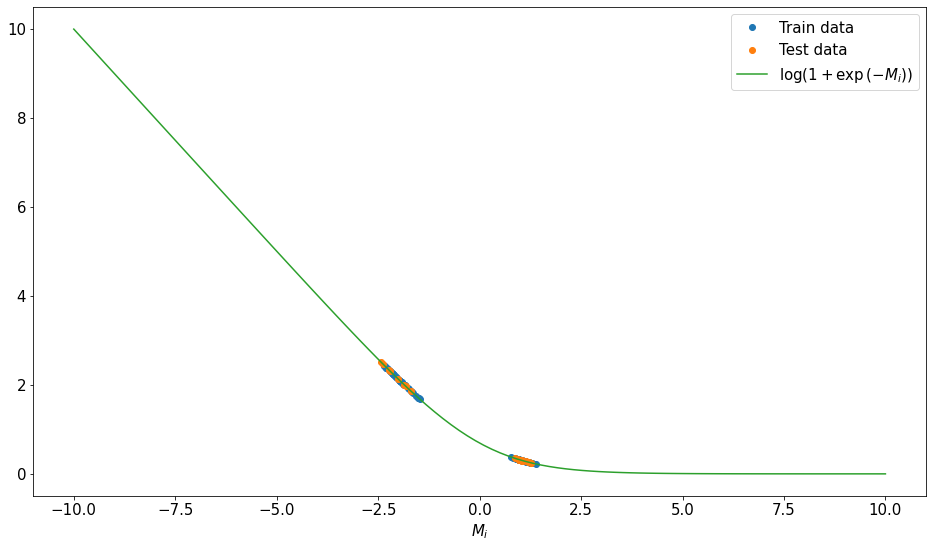

In [ ]:
plt.figure(figsize=(16, 9))
x = np.linspace(-10, 10, 100)
y1 = [loss(x_) for x_ in x]
y2 = [loss(m) for m in M_train]
y3 = [loss(m) for m in M_test]
plt.plot(M_train, y2, 'o', label=r'Train data')
plt.plot(M_test, y3, 'o', label=r'Test data')
plt.plot(x, y1, '-', label=r'$\log(1 + \exp\left(-M_i\right))$')
plt.xlabel(r'$M_i$')
plt.legend()
plt.show()

## Loss minimisation

Let's minimize:

$$
L_{\mathrm{LogReg}}(\mathbf{M}) =  \frac{1}{n_{\mathrm{objects}}} \sum_i^{n_{\mathrm{objects}}} \log \sigma(M_i) = \frac{1}{n_{\mathrm{objects}}} \sum_i^{n_{\mathrm{objects}}} \log(1 + \exp\left(-M_i\right))
$$

Derivative:

$$
\frac{\partial}{\partial w_j} L_{\mathrm{LogReg}}(\mathbf{M}) = \frac{1}{n_{\mathrm{objects}}} \sum_i^{n_{\mathrm{objects}}} \frac{\partial}{\partial w_j} \log \sigma(M_i) \\ = \\\frac{1}{n_{\mathrm{objects}}} \sum_i^{n_{\mathrm{objects}}} \frac{1}{\sigma(M_i)} \frac{\partial}{\partial w_j} \sigma(M_i) \\ = \\ = \frac{1}{n_{\mathrm{objects}}} \sum_i^{n_{\mathrm{objects}}} \frac{1}{\sigma(M_i)} \sigma(M_i)(1 - \sigma(M_i)) \frac{\partial}{\partial w_j} M_i \\ = \frac{1}{n_{\mathrm{objects}}} \sum_i^{n_{\mathrm{objects}}} (1 - \sigma(M_i))  \frac{\partial}{\partial w_j} M_i = \\ = \frac{1}{n_{\mathrm{objects}}} \sum_i^{n_{\mathrm{objects}}} (1 - \sigma(M_i))  \frac{\partial}{\partial w_j} y_i\cdot x_i^\mathrm{T} w = \\ = \frac{1}{n_{\mathrm{objects}}} \sum_i^{n_{\mathrm{objects}}} (1 - \sigma(M_i)) \frac{\partial}{\partial w_j} y_i \sum^{n_{\mathrm{features}}}_j x^j_i \cdot w_j = \\ = \frac{1}{n_{\mathrm{objects}}} \sum_i^{n_{\mathrm{objects}}} (1 - \sigma(M_i)) y_i x^j_i
$$

In [ ]:
w0 = np.random.uniform(low=-1, high=1, size=5)
w0

array([ 0.01017547, -0.4421805 ,  0.6162725 ,  0.36643835, -0.4272762 ])

In [ ]:
def Loss(w):
    M = margin(y_train, X_train, w)
    return loss(M)

In [ ]:
def Loss_grad(w):
    # task : calculate the gradient of loss function defined above
    M = margin(y_train, X_train, w)
    grad = np.zeros(w.shape)
    for j in range(w.shape[0]):
        grad[j] = np.mean((1-sigmoid(M)) * y_train * X_train[:, j])
    return grad

In [ ]:
from tqdm import tqdm

In [ ]:
def gradient_descent(w0, n_steps=100, alpha=0.01):
    w = w0
    train_loss = [loss(margin(y_train, X_train, w))]
    test_loss = [loss(margin(y_test, X_test, w))]
    for i in tqdm(range(n_steps)):
        grad = Loss_grad(w)
        w = w + alpha * grad
        train_loss.append(loss(margin(y_train, X_train, w)))
        test_loss.append(loss(margin(y_test, X_test, w)))
    return w, train_loss, test_loss

In [ ]:
w0 = np.random.uniform(low=-1, high=1, size=5)
print(w0)

[ 0.03803317  0.27797279 -0.11212478  0.16830532 -0.78947803]


In [ ]:
w_optimal, train_loss, test_loss = gradient_descent(w0, n_steps=1000, alpha=0.01)

100%|██████████| 1000/1000 [00:00<00:00, 3435.47it/s]


In [ ]:
print(w_optimal)

[-0.2427296  -0.83312229  1.55861526  0.88098131 -0.97775746]


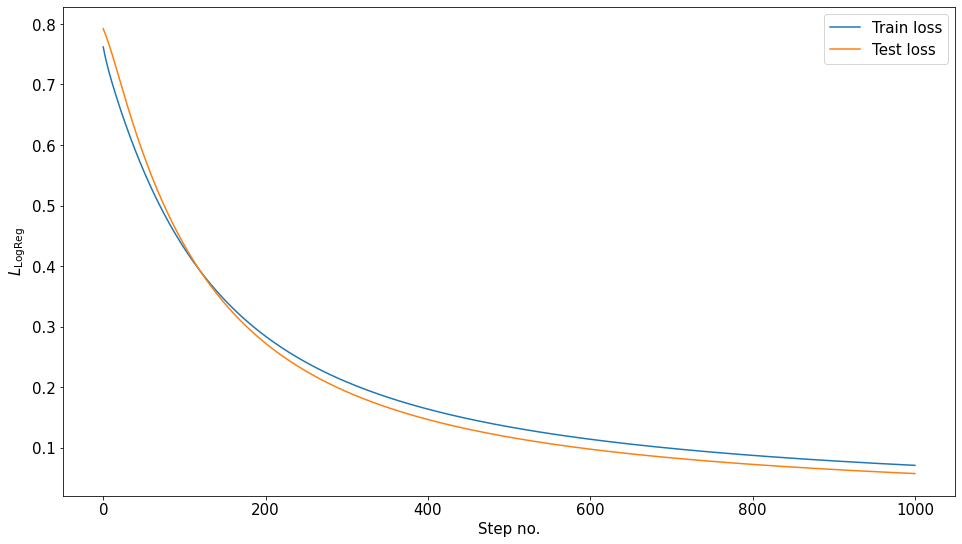

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.legend()
plt.xlabel('Step no.')
plt.ylabel(r'$L_{\mathrm{LogReg}}$')
plt.show()

In [ ]:
M_train = margin(y_train, X_train, w_optimal)
M_test = margin(y_test, X_test, w_optimal)
print(f'Train loss: {loss(M_train)}')
print(f'Test loss: {loss(M_test)}')

Train loss: 0.07074903628111225
Test loss: 0.0572137050367658


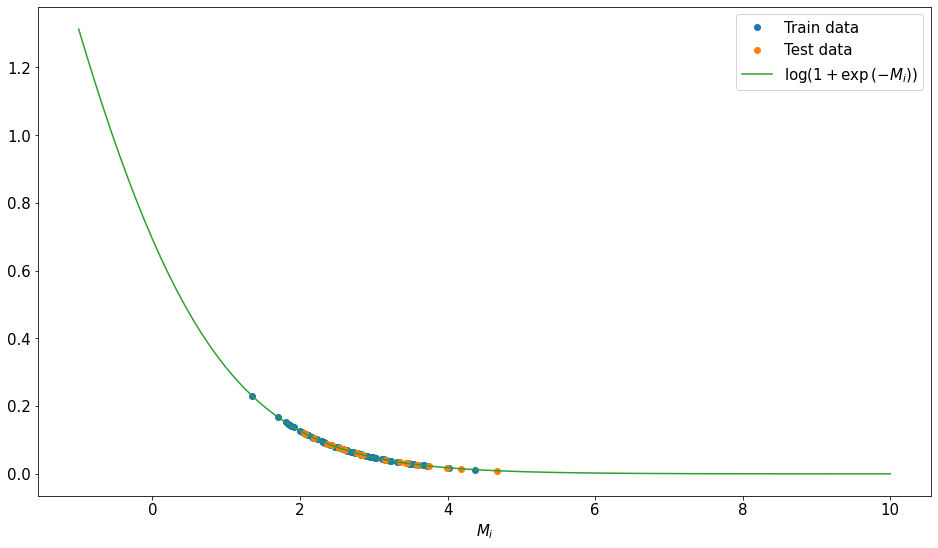

In [ ]:
plt.figure(figsize=(16, 9))
x = np.linspace(-1, 10, 100)
y1 = [loss(x_) for x_ in x]
y2 = [loss(m) for m in M_train]
y3 = [loss(m) for m in M_test]
plt.plot(M_train, y2, 'o', label=r'Train data')
plt.plot(M_test, y3, 'o', label=r'Test data')
plt.plot(x, y1, '-', label=r'$\log(1 + \exp\left(-M_i\right))$')
plt.xlabel(r'$M_i$')
plt.legend()
plt.show()

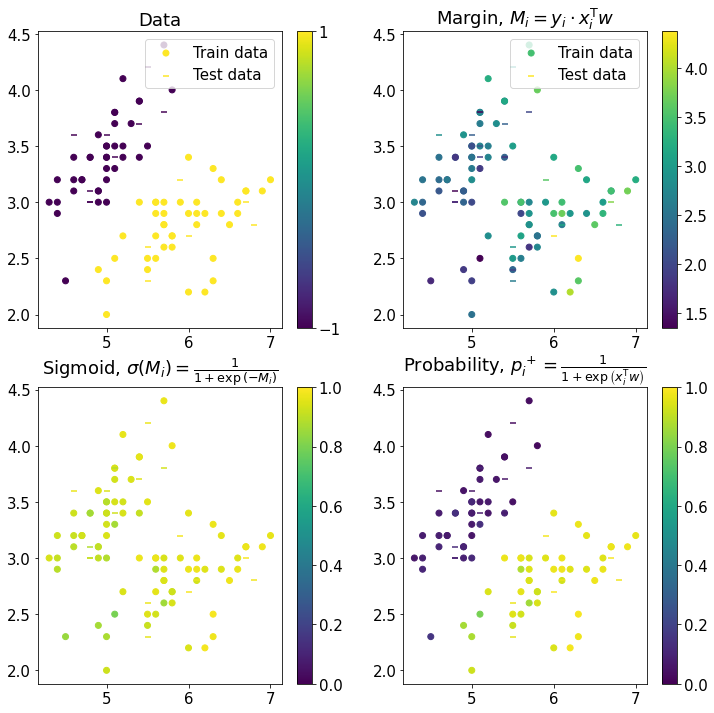

In [ ]:
M_train = margin(y_train, X_train, w_optimal)
M_test = margin(y_test, X_test, w_optimal)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

ax1.set_title('Data')
sc1 = ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train data')
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='_', label='Test data')
fig.colorbar(sc1, ax=ax1, ticks=[-1, 1])
ax1.legend()

ax2.set_title(r'Margin, $M_i = y_i\cdot x_i^\mathrm{T} w$')
sc2 = ax2.scatter(X_train[:, 0], X_train[:, 1], c=M_train, marker='o', label='Train data')
ax2.scatter(X_test[:, 0], X_test[:, 1], c=M_test, marker='_', label='Test data')
fig.colorbar(sc2, ax=ax2)
ax2.legend()

ax3.set_title(r'Sigmoid, $\sigma(M_i) = \frac{1}{1+\exp\left(-M_i\right)}$')
sc3 = ax3.scatter(X_train[:, 0], X_train[:, 1], c=sigmoid(M_train), vmin=0, vmax=1, marker='o', label='Train data')
ax3.scatter(X_test[:, 0], X_test[:, 1], c=sigmoid(M_test), vmin=0, vmax=1, marker='_', label='Test data')
fig.colorbar(sc3, ax=ax3)

ax4.set_title(r'Probability, $p^+_i = \frac{1}{1+\exp\left(x_i^\mathrm{T} w\right)}$')
sc4 = ax4.scatter(X_train[:, 0], X_train[:, 1], c=p(X_train, w_optimal), vmin=0, vmax=1, marker='o', label='Train data')
ax4.scatter(X_test[:, 0], X_test[:, 1], c=p(X_test, w_optimal), vmin=0, vmax=1, marker='_', label='Test data')
fig.colorbar(sc4, ax=ax4)

## Loss minimisation + L2 reg

Let's minimize:

$$
L(\mathbf{w}) = L_{\mathrm{LogReg}}(\mathbf{M}) + \lambda ||\mathbf{w}||_2^2 = \frac{1}{n_{\mathrm{objects}}} \sum_i^{n_{\mathrm{objects}}} \log(1 + \exp\left(-M_i\right)) + \lambda ||\mathbf{w}||_2^2
$$

In [ ]:
from scipy.optimize import minimize

In [ ]:
w0 = np.random.uniform(low=-1, high=1, size=5)
w0

array([-0.34816984, -0.94606666, -0.1378822 , -0.12391974, -0.79946424])

In [ ]:
def Loss_L2(w, l=0.1):
    # task : implement loss function with L2 regularisation
    # hint : L2(arr) = np.linalg.norm(arr)
    M = margin(y_train, X_train, w)
    return loss(M) + l * np.square(np.linalg.norm(w))

In [ ]:
%%time
w0 = np.random.uniform(low=-1, high=1, size=5)
res = minimize(Loss_L2, w0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.331781
         Iterations: 412
         Function evaluations: 678
CPU times: user 52.5 ms, sys: 53 µs, total: 52.5 ms
Wall time: 55.9 ms


For the curious: [Nelder-mead](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)

In [ ]:
w_optimal = res.x
print(w_optimal)

[-0.13795632 -0.57326976  0.89556134  0.38487598 -0.10177189]


In [ ]:
M_train = margin(y_train, X_train, w_optimal)
M_test = margin(y_test, X_test, w_optimal)
print(f'Train loss: {loss(M_train)}')
print(f'Test loss: {loss(M_test)}')

Train loss: 0.20096244571369198
Test loss: 0.1810391702378759


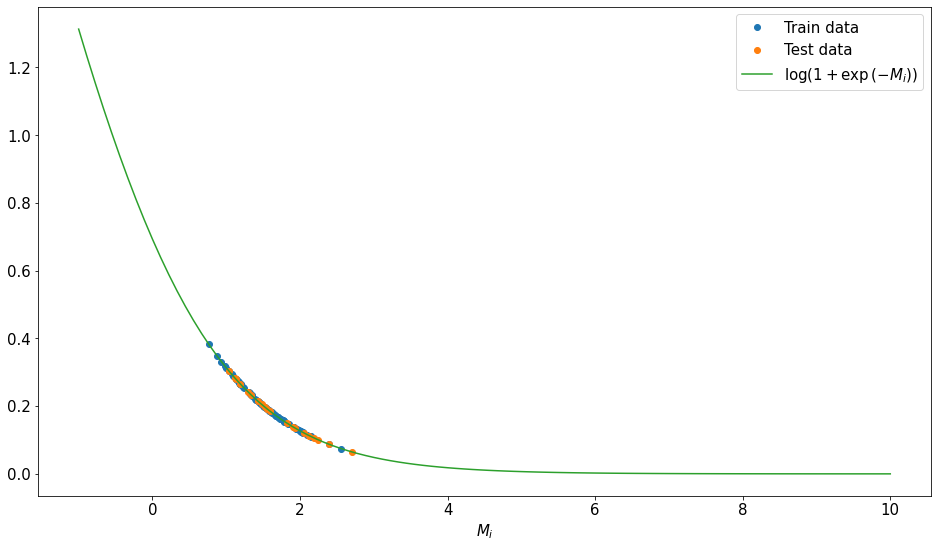

In [ ]:
plt.figure(figsize=(16, 9))
x = np.linspace(-1, 10, 100)
y1 = [loss(x_) for x_ in x]
y2 = [loss(m) for m in M_train]
y3 = [loss(m) for m in M_test]
plt.plot(M_train, y2, 'o', label=r'Train data')
plt.plot(M_test, y3, 'o', label=r'Test data')
plt.plot(x, y1, '-', label=r'$\log(1 + \exp\left(-M_i\right))$')
plt.xlabel(r'$M_i$')
plt.legend()
plt.show()

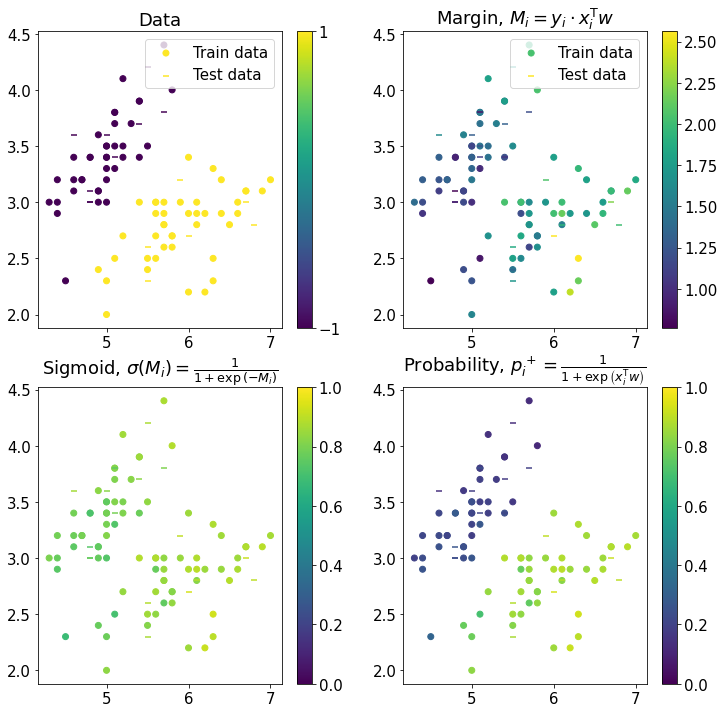

In [ ]:
M_train = margin(y_train, X_train, w_optimal)
M_test = margin(y_test, X_test, w_optimal)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

ax1.set_title('Data')
sc1 = ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train data')
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='_', label='Test data')
fig.colorbar(sc1, ax=ax1, ticks=[-1, 1])
ax1.legend()

ax2.set_title(r'Margin, $M_i = y_i\cdot x_i^\mathrm{T} w$')
sc2 = ax2.scatter(X_train[:, 0], X_train[:, 1], c=M_train, marker='o', label='Train data')
ax2.scatter(X_test[:, 0], X_test[:, 1], c=M_test, marker='_', label='Test data')
fig.colorbar(sc2, ax=ax2)
ax2.legend()

ax3.set_title(r'Sigmoid, $\sigma(M_i) = \frac{1}{1+\exp\left(-M_i\right)}$')
sc3 = ax3.scatter(X_train[:, 0], X_train[:, 1], c=sigmoid(M_train), vmin=0, vmax=1, marker='o', label='Train data')
ax3.scatter(X_test[:, 0], X_test[:, 1], c=sigmoid(M_test), vmin=0, vmax=1, marker='_', label='Test data')
fig.colorbar(sc3, ax=ax3)

ax4.set_title(r'Probability, $p^+_i = \frac{1}{1+\exp\left(x_i^\mathrm{T} w\right)}$')
sc4 = ax4.scatter(X_train[:, 0], X_train[:, 1], c=p(X_train, w_optimal), vmin=0, vmax=1, marker='o', label='Train data')
ax4.scatter(X_test[:, 0], X_test[:, 1], c=p(X_test, w_optimal), vmin=0, vmax=1, marker='_', label='Test data')
fig.colorbar(sc4, ax=ax4)

## Prediction

$$
c_i = \left\{\begin{matrix}
1 & \text{ if } p^+_i \geq a \\
-1 & \text{ else}
\end{matrix}\right.
$$

where
* $c_i \in {-1, 1}$ - class tag
* $a \in [0, 1]$ - hyperparameter 

In [ ]:
def predict(X_in, w, a=0.5):
    # task : implement the prediction function
    # hint : p+ is implemented above
    c = p(X_in, w)
    c[c >= a] = 1
    c[c < a] = -1
    return c

In [ ]:
y_pred = predict(X_test, w, a=0.5)
print(y_pred)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]


## Metrics
True positive rate (sensitivity, recall, hit rate): 

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

True negative rate (specificity, selectivity):
$$
\text{TNR} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

False negative rate (miss rate):
$$
\text{FNR} = \frac{\text{FN}}{\text{FN} + \text{TP}}
$$

False positive rate (fall-out):
$$
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$

In [ ]:
y_pred = predict(X_test, w, a=0.5)

In [ ]:
def TP(y_pred, y_true):
    # task : count all true positive
    # hint : use y_pred == 1 as mask
    return np.sum(y_pred[y_pred == 1] == y_true[y_pred == 1])

def TN(y_pred, y_true):
    # task : count all true negative
    # hint : use y_pred == -1 as mask
    return np.sum(y_pred[y_pred == -1] == y_true[y_pred == -1])

def FP(y_pred, y_true):
    # task : count all false negative
    return np.sum(y_pred[y_pred == 1] != y_true[y_pred == 1])

def FN(y_pred, y_true):
    # task : count all false negative
    return np.sum(y_pred[y_pred == -1] != y_true[y_pred == -1])

In [ ]:
# test

a = np.array([1, -1, 1, -1])
b = np.array([1, -1, -1, 1])

print(TP(a, b)) # 1
print(TN(a, b)) # 1
print(FP(a, b)) # 1
print(FN(a, b)) # 1

1
1
1
1


In [ ]:
def TPR(y_pred, y_true):
    if TP(y_pred, y_true) + FN(y_pred, y_true) > 0:
        return TP(y_pred, y_true) / (TP(y_pred, y_true) + FN(y_pred, y_true))
    else:
        return 0

def TNR(y_pred, y_true):
    return TN(y_pred, y_true) / (TN(y_pred, y_true) + FP(y_pred, y_true))

def FNR(y_pred, y_true):
    return FN(y_pred, y_true) / (FN(y_pred, y_true) + TP(y_pred, y_true))

def FPR(y_pred, y_true):
    if FP(y_pred, y_true) + TN(y_pred, y_true) > 0:
        return FP(y_pred, y_true) / (FP(y_pred, y_true) + TN(y_pred, y_true))
    else:
        return 0

### Confusion matrix

See [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

$C = \begin{pmatrix}
TP & FN \\ 
FP & TN
\end{pmatrix}$
where 
* TP - true positive count
* TN - true negative count
* FP - false positive count
* FN - false negative count

In [ ]:
def confusion_matrix(y_pred, y_true):
    return np.asarray([[TP(y_pred, y_true), FN(y_pred, y_true)], [FP(y_pred, y_true), TN(y_pred, y_true)]])

In [ ]:
y_pred = predict(X_test, w_optimal, a=0.5)
confusion_matrix(y_pred, y_test)

array([[ 8,  0],
       [ 0, 12]])

In [ ]:
y_pred = predict(X_test, w_optimal, a=0.2)
confusion_matrix(y_pred, y_test)

array([[8, 0],
       [6, 6]])

In [ ]:
y_pred = predict(X_test, w_optimal, a=0.9)
confusion_matrix(y_pred, y_test)

array([[ 3,  5],
       [ 0, 12]])

## ROC-curve

[Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

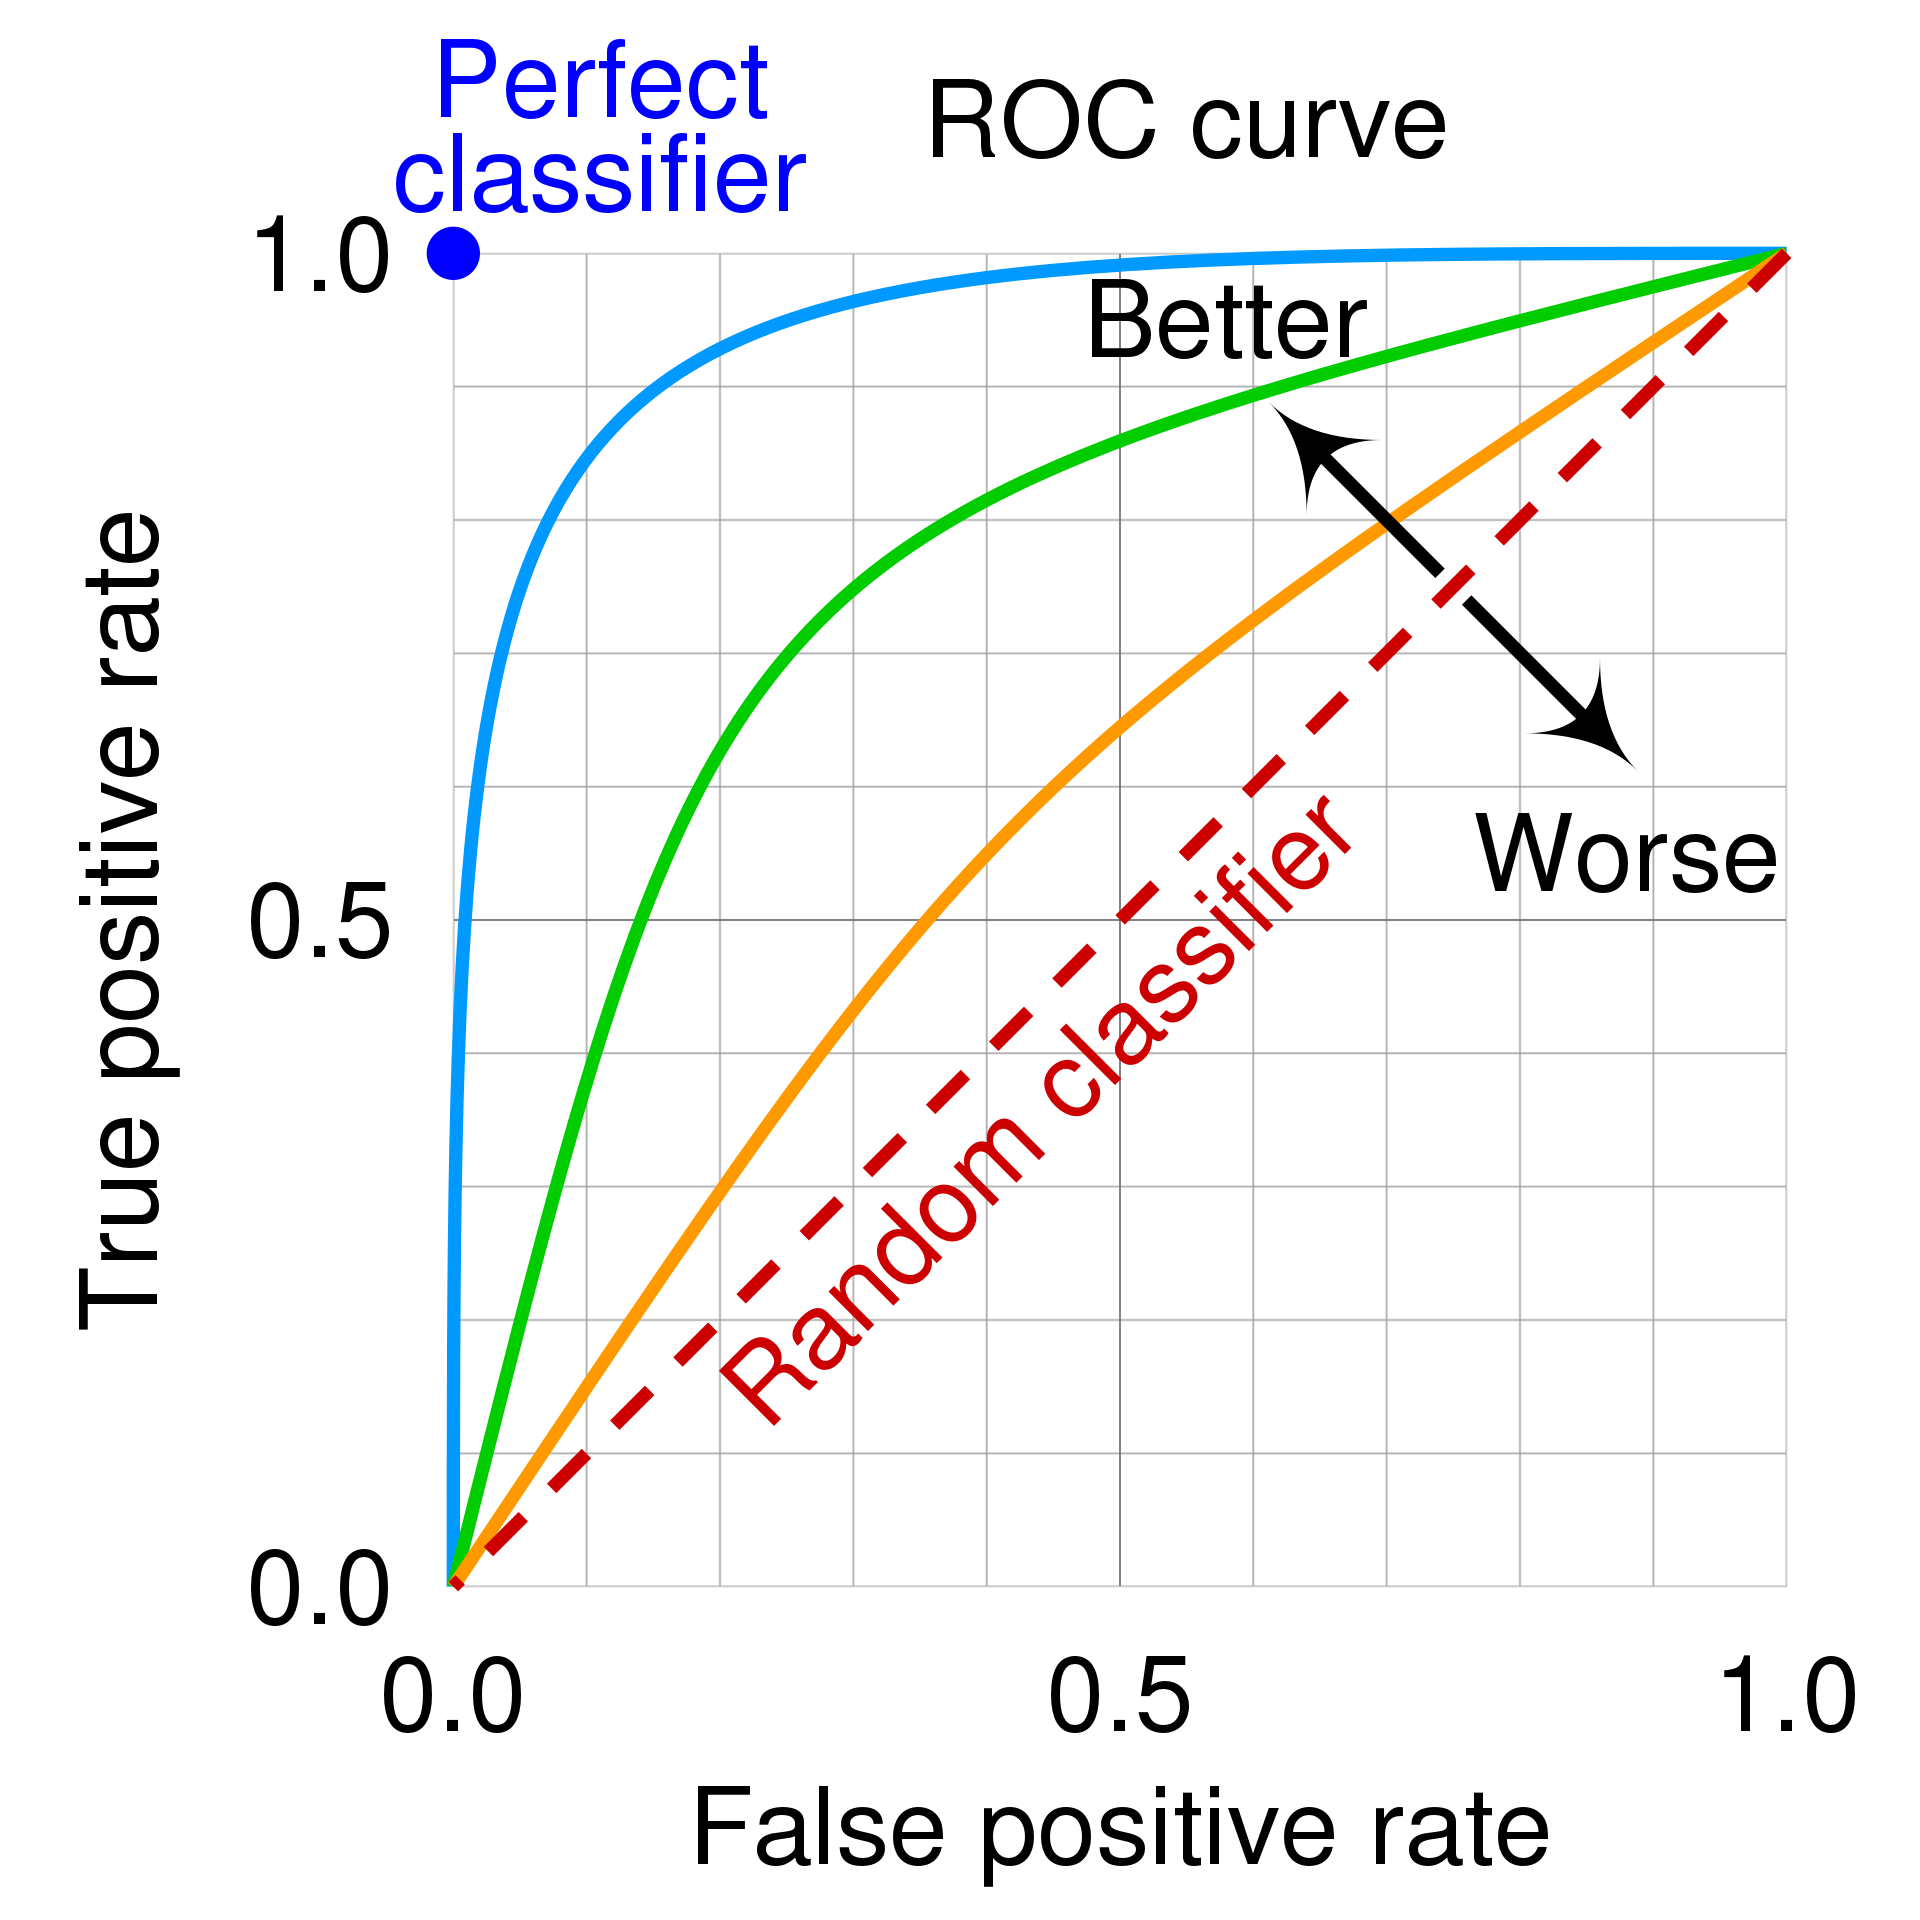

In [ ]:
def roc_curve(X_in, w_in, y_in, n_points=100):
    x_fpr = list()
    y_tpr = list()
    A = np.linspace(0, 1, n_points)
    for a in A[::-1]:
        y_pred = predict(X_in, w_in, a=a)
        x_fpr.append(FPR(y_pred, y_in))
        y_tpr.append(TPR(y_pred, y_in))
    return np.array(x_fpr), np.array(y_tpr)

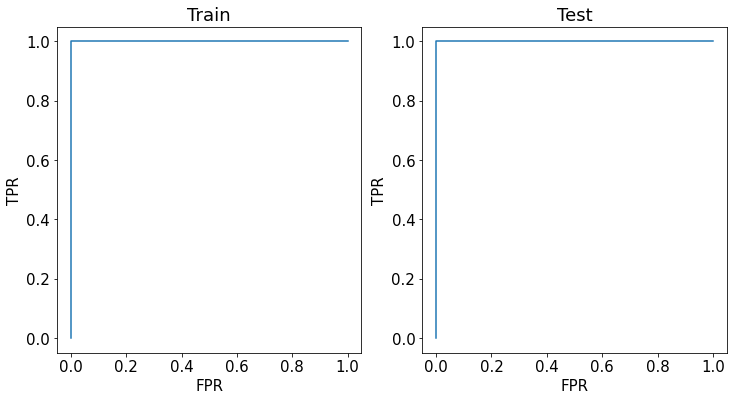

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Train')
x_fpr, y_tpr = roc_curve(X_train, w_optimal, y_train)
ax1.plot(x_fpr, y_tpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')

ax2.set_title('Test')
x_fpr, y_tpr = roc_curve(X_test, w_optimal, y_test)
ax2.plot(x_fpr, y_tpr)
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')

plt.show()

In [ ]:
def integrate(y, x):
    # task : calculate area under curve
    sum = 0
    for i in range(1, x.shape[0]):
        sum += y[i] * (x[i] - x[i-1])
    return sum

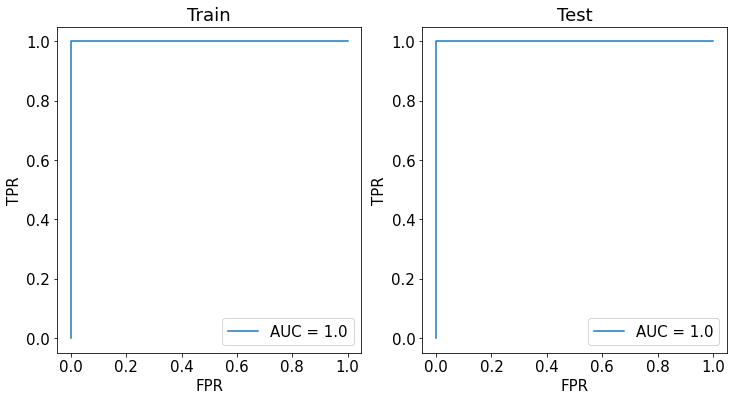

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Train')
x_fpr, y_tpr = roc_curve(X_train, w_optimal, y_train)
auc = integrate(y_tpr, x_fpr)
ax1.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend()

ax2.set_title('Test')
x_fpr, y_tpr = roc_curve(X_test, w_optimal, y_test)
auc = integrate(y_tpr, x_fpr)
ax2.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.legend()

plt.show()

## Non-separable classes case

In [ ]:
mask = df_y != 0
print(mask.values)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


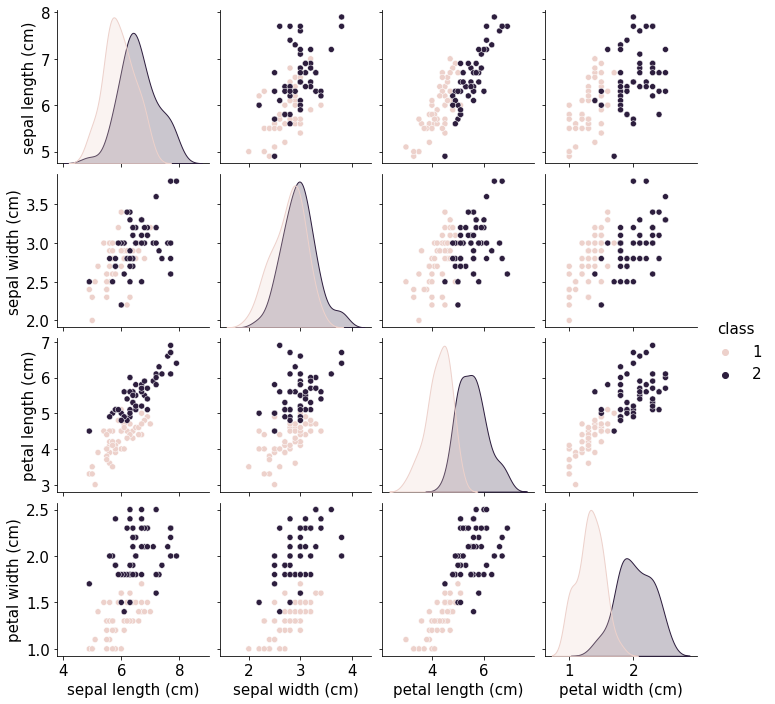

In [ ]:
sns.pairplot(df_X[mask], hue='class')

In [ ]:
X = df_X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values[mask]
X = add_ones(X)

In [ ]:
y = df_y[mask].values
y[y == 2] = -1
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Gradient descent for non-separable case

In [ ]:
w_optimal, train_loss, test_loss = gradient_descent(w0, n_steps=10000, alpha=0.01)

100%|██████████| 10000/10000 [00:01<00:00, 5148.75it/s]


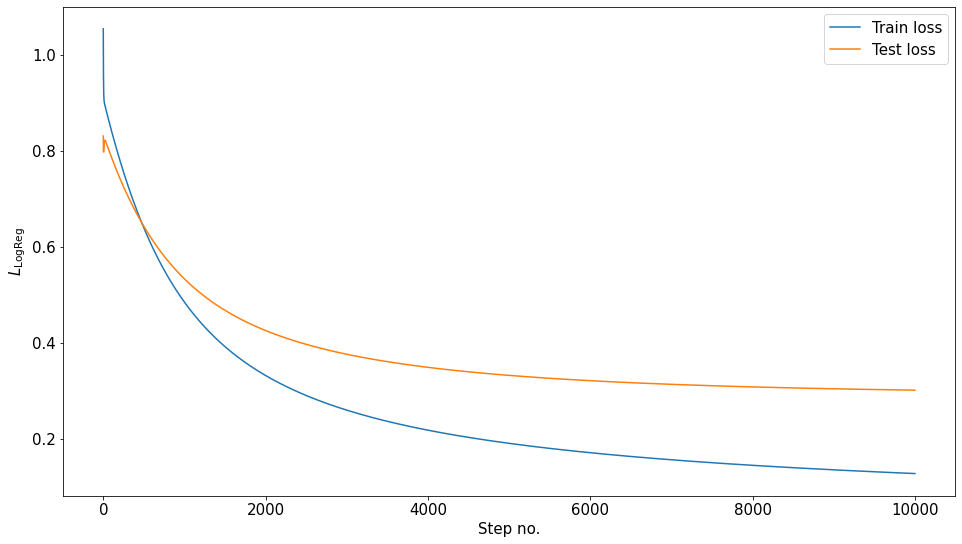

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.legend()
plt.xlabel('Step no.')
plt.ylabel(r'$L_{\mathrm{LogReg}}$')
plt.show()

In [ ]:
M_train = margin(y_train, X_train, w_optimal)
M_test = margin(y_test, X_test, w_optimal)
print(f'Train loss: {loss(M_train)}')
print(f'Test loss: {loss(M_test)}')

Train loss: 0.12722610229760936
Test loss: 0.30096469734173886


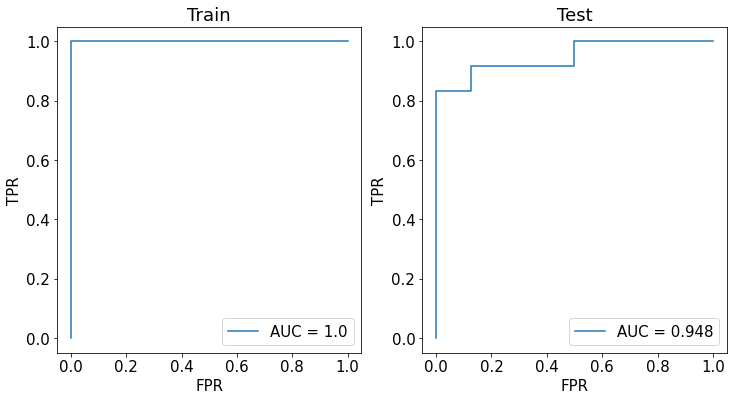

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Train')
x_fpr, y_tpr = roc_curve(X_train, w_optimal, y_train)
auc = integrate(y_tpr, x_fpr)
ax1.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend()

ax2.set_title('Test')
x_fpr, y_tpr = roc_curve(X_test, w_optimal, y_test)
auc = integrate(y_tpr, x_fpr)
ax2.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.legend()

plt.show()

### Nelder-mead for non-separable case

In [ ]:
def Loss_L2(w, l=0.001):
    # task : implement loss function with L2 regularisation
    # hint : L2(arr) = np.linalg.norm(arr)
    M = margin(y_train, X_train, w)
    return loss(M) + l * np.square(np.linalg.norm(w))

In [ ]:
%%time
w0 = np.random.uniform(low=-1, high=1, size=5)
res = minimize(Loss_L2, w0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

CPU times: user 94.5 ms, sys: 878 µs, total: 95.4 ms
Wall time: 111 ms


In [ ]:
w_optimal = res.x
print(w_optimal)

[ 2.3337902   3.64797565 -4.18850354 -4.47190295  2.73247605]


In [ ]:
M_train = margin(y_train, X_train, w_optimal)
M_test = margin(y_test, X_test, w_optimal)
print(f'Train loss: {loss(M_train)}')
print(f'Test loss: {loss(M_test)}')

Train loss: 0.08952682398490705
Test loss: 0.30829516175762206


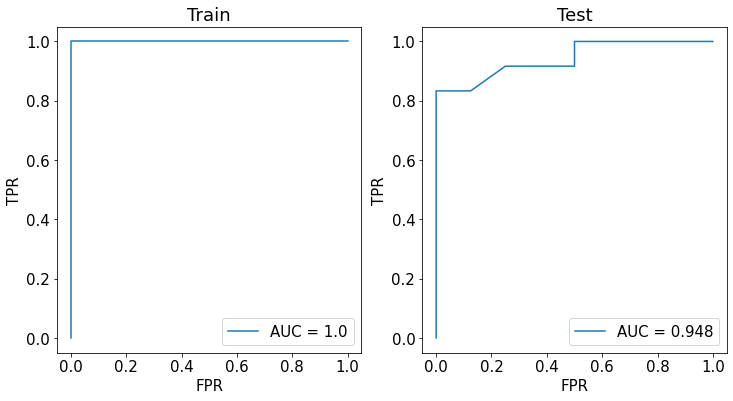

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Train')
x_fpr, y_tpr = roc_curve(X_train, w_optimal, y_train)
auc = integrate(y_tpr, x_fpr)
ax1.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend()

ax2.set_title('Test')
x_fpr, y_tpr = roc_curve(X_test, w_optimal, y_test)
auc = integrate(y_tpr, x_fpr)
ax2.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.legend()

plt.show()

## Normalized Case

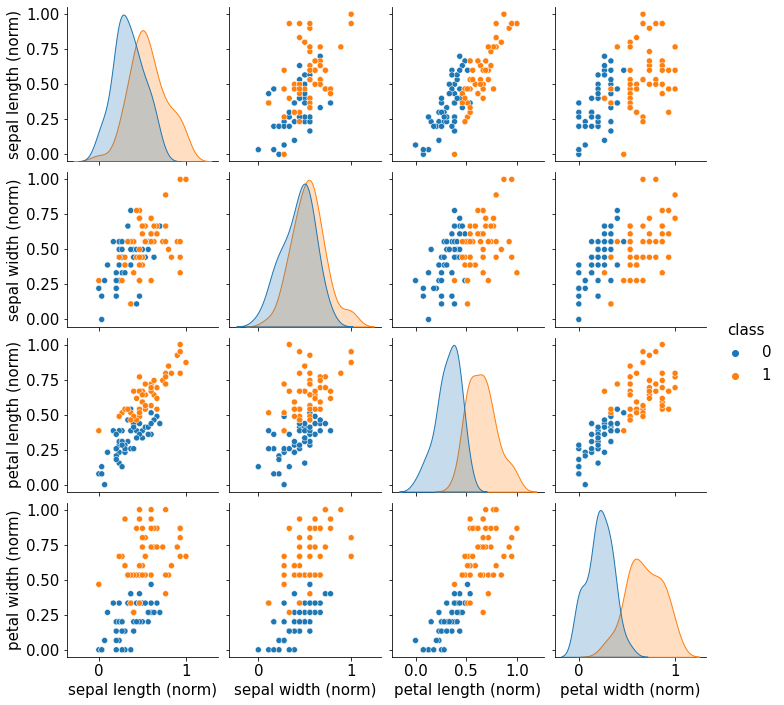

In [ ]:
df_X, df_y = load_iris(return_X_y=True, as_frame=True)
df_X['class'] = df_y

mask = df_y != 0

y = df_y[mask].values
y[y == 2] = -1

X = df_X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values[mask]
X_norm = np.stack(list([(normalize(X[:, i])) for i in range(4)])).T

df_X_norm = pd.DataFrame()
df_X_norm['sepal length (norm)'] = X_norm[:, 0]
df_X_norm['sepal width (norm)'] = X_norm[:, 1]
df_X_norm['petal length (norm)'] = X_norm[:, 2]
df_X_norm['petal width (norm)'] = X_norm[:, 3]
df_X_norm['class'] = df_X['class']
df_X_norm.head()

sns.pairplot(df_X_norm, hue='class')

In [ ]:
X = X_norm
X = add_ones(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
w_optimal, train_loss, test_loss = gradient_descent(w0, n_steps=10000, alpha=0.01)
print(w_optimal)

100%|██████████| 10000/10000 [00:03<00:00, 2511.34it/s]

[-0.55550481  0.81044988 -3.29032011 -4.07326241  3.15497777]


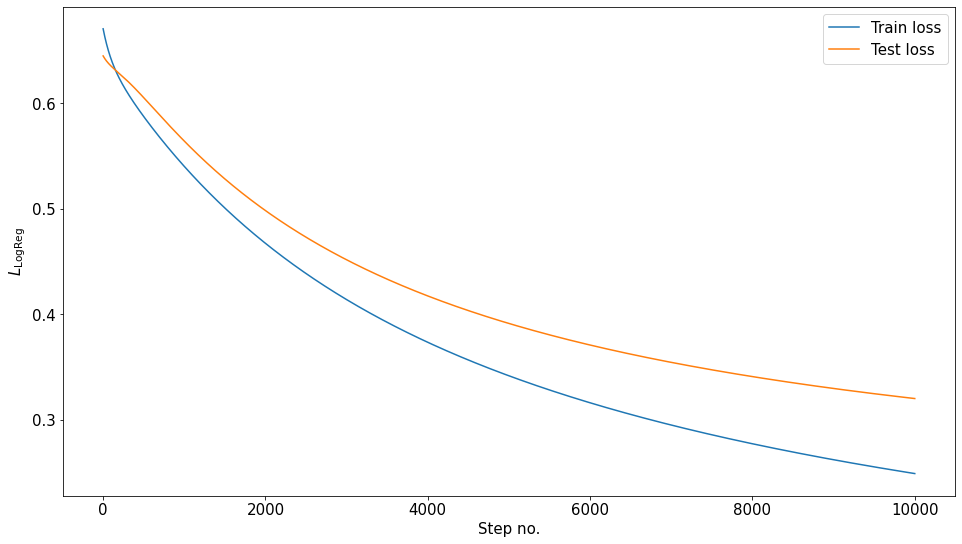

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.legend()
plt.xlabel('Step no.')
plt.ylabel(r'$L_{\mathrm{LogReg}}$')
plt.show()

In [ ]:
M_train = margin(y_train, X_train, w_optimal)
M_test = margin(y_test, X_test, w_optimal)
print(f'Train loss: {loss(M_train)}')
print(f'Test loss: {loss(M_test)}')

Train loss: 0.2489995089819462
Test loss: 0.320080636012253


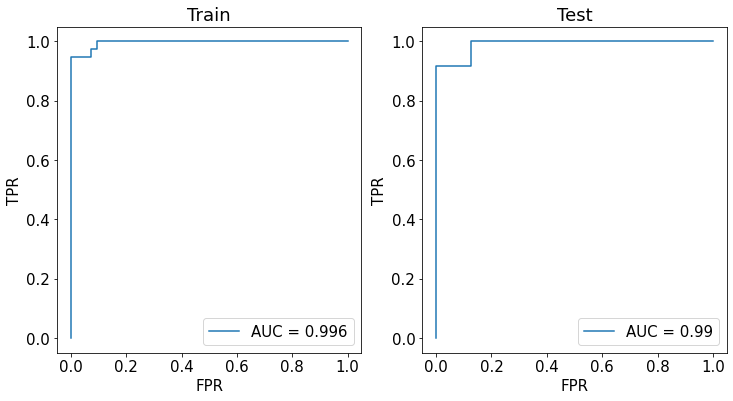

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Train')
x_fpr, y_tpr = roc_curve(X_train, w_optimal, y_train)
auc = integrate(y_tpr, x_fpr)
ax1.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend()

ax2.set_title('Test')
x_fpr, y_tpr = roc_curve(X_test, w_optimal, y_test)
auc = integrate(y_tpr, x_fpr)
ax2.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.legend()

plt.show()

In [ ]:
%%time
w0 = np.random.uniform(low=-1, high=1, size=5)
res = minimize(Loss_L2, w0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
w_optimal = res.x
print(w_optimal)

Optimization terminated successfully.
         Current function value: 0.246749
         Iterations: 477
         Function evaluations: 803
[-0.00882873  3.0261365  -4.94760928 -6.6204009   3.74346308]
CPU times: user 84.3 ms, sys: 901 µs, total: 85.3 ms
Wall time: 231 ms


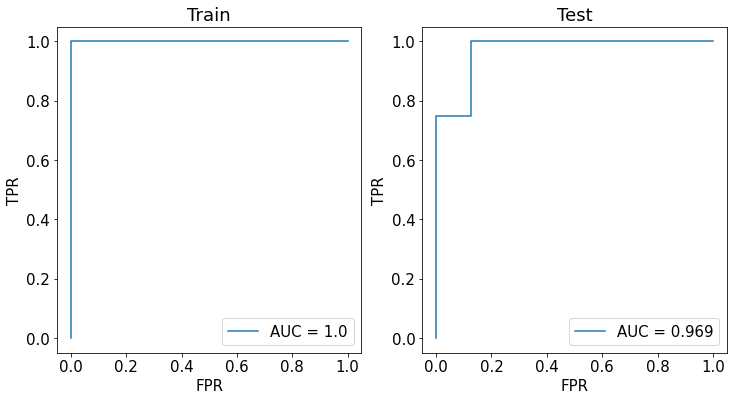

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Train')
x_fpr, y_tpr = roc_curve(X_train, w_optimal, y_train)
auc = integrate(y_tpr, x_fpr)
ax1.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend()

ax2.set_title('Test')
x_fpr, y_tpr = roc_curve(X_test, w_optimal, y_test)
auc = integrate(y_tpr, x_fpr)
ax2.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.legend()

plt.show()

# Sci-kit learn solution

Explore documentation: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, roc_curve

In [ ]:
df_X, df_y = load_iris(return_X_y=True, as_frame=True)
df_X['class'] = df_y

mask = df_y != 0

X = df_X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values[mask]
y = df_y[mask].values
y[y == 2] = -1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.predict(X_test)

array([-1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
       -1,  1,  1])

In [ ]:
clf.predict_proba(X_test)

array([[0.56678633, 0.43321367],
       [0.90636079, 0.09363921],
       [0.96137823, 0.03862177],
       [0.05348478, 0.94651522],
       [0.08338817, 0.91661183],
       [0.05836765, 0.94163235],
       [0.48079736, 0.51920264],
       [0.97308354, 0.02691646],
       [0.01327227, 0.98672773],
       [0.1639731 , 0.8360269 ],
       [0.27815663, 0.72184337],
       [0.02383381, 0.97616619],
       [0.60671217, 0.39328783],
       [0.66123711, 0.33876289],
       [0.96427456, 0.03572544],
       [0.22798516, 0.77201484],
       [0.52797373, 0.47202627],
       [0.57043131, 0.42956869],
       [0.03242584, 0.96757416],
       [0.01455384, 0.98544616]])

See visualisation documentation: [Object Visualisaion](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

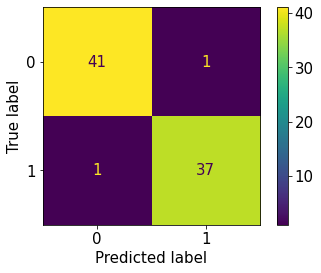

In [ ]:
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

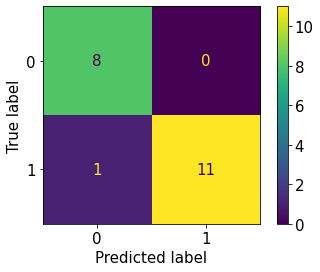

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

0.9981203007518797


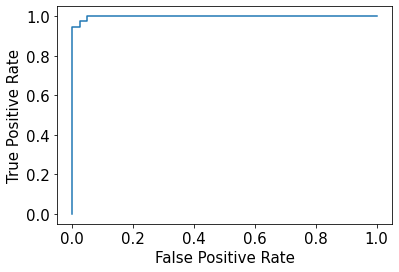

In [ ]:
y_score = clf.decision_function(X_train)

auc = roc_auc_score(y_train, y_score)
print(auc)

fpr, tpr, _ = roc_curve(y_train, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

0.9583333333333333


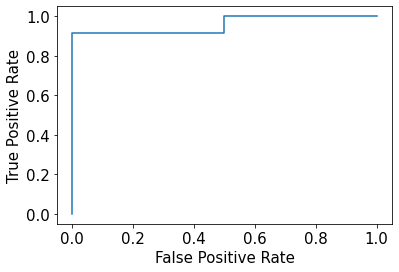

In [ ]:
y_score = clf.decision_function(X_test)

auc = roc_auc_score(y_test, y_score)
print(auc)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Multiclass task

In [ ]:
df_X, df_y = load_iris(return_X_y=True, as_frame=True)
df_X['class'] = df_y
y = df_y.values

X = df_X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
X_norm = np.stack(list([(normalize(X[:, i])) for i in range(4)])).T

df_X_norm = pd.DataFrame()
df_X_norm['sepal length (norm)'] = X_norm[:, 0]
df_X_norm['sepal width (norm)'] = X_norm[:, 1]
df_X_norm['petal length (norm)'] = X_norm[:, 2]
df_X_norm['petal width (norm)'] = X_norm[:, 3]
df_X_norm['class'] = df_X['class']
df_X_norm.head()

,sepal length (norm),sepal width (norm),petal length (norm),petal width (norm),class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


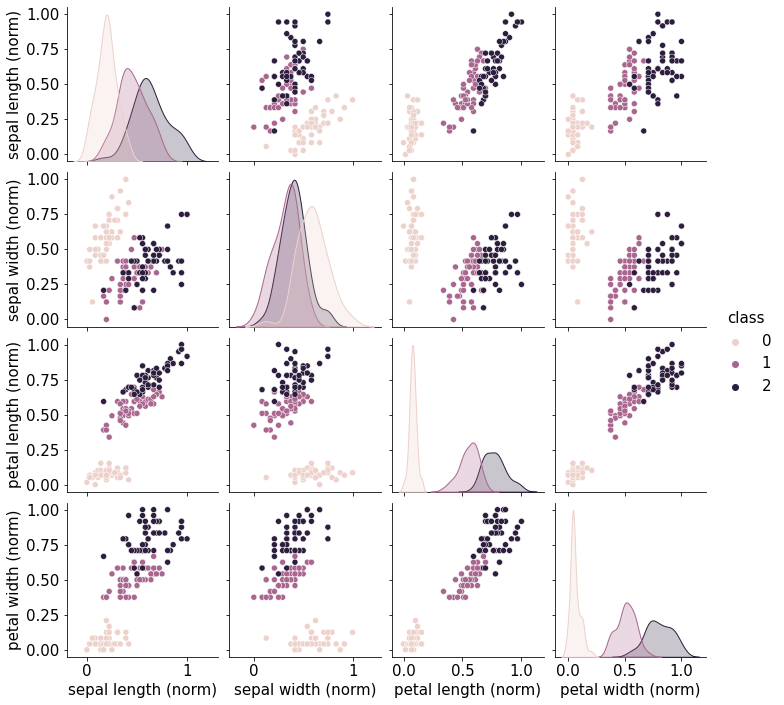

In [ ]:
sns.pairplot(df_X_norm, hue='class')

## 1 vs 1

In [ ]:
def roc_curve(X_in, w_in, y_in, n_points=100):
    x_fpr = list()
    y_tpr = list()
    A = np.linspace(0, 1, n_points)
    for a in A[::-1]:
        y_pred = predict(X_in, w_in, a=a)
        x_fpr.append(FPR(y_pred, y_in))
        y_tpr.append(TPR(y_pred, y_in))
    return np.array(x_fpr), np.array(y_tpr)

In [ ]:
mask0 = y != 0
X = X_norm[mask0]
X = add_ones(X)
_y = y[mask0]
_y[_y == 2] = -1

X_train, X_test, y_train, y_test = train_test_split(X, _y, test_size=0.2, random_state=42)

w_optimal_0, _, _ = gradient_descent(w0, n_steps=10000, alpha=0.01)

100%|██████████| 10000/10000 [00:05<00:00, 1789.67it/s]


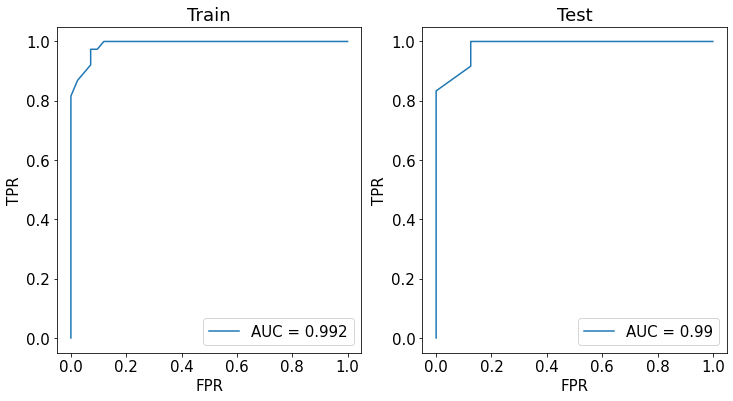

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Train')
x_fpr, y_tpr = roc_curve(X_train, w_optimal_0, y_train)
auc = integrate(y_tpr, x_fpr)
ax1.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend()

ax2.set_title('Test')
x_fpr, y_tpr = roc_curve(X_test, w_optimal_0, y_test)
auc = integrate(y_tpr, x_fpr)
ax2.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.legend()

plt.show()

In [ ]:
mask1 = y != 1
X = X_norm[mask1]
X = add_ones(X)
_y = y[mask1]
_y[_y == 0] = -1
_y[_y == 2] = 1

X_train, X_test, y_train, y_test = train_test_split(X, _y, test_size=0.2, random_state=42)

w_optimal_1, _, _ = gradient_descent(w0, n_steps=10000, alpha=0.01)

100%|██████████| 10000/10000 [00:03<00:00, 3112.45it/s]


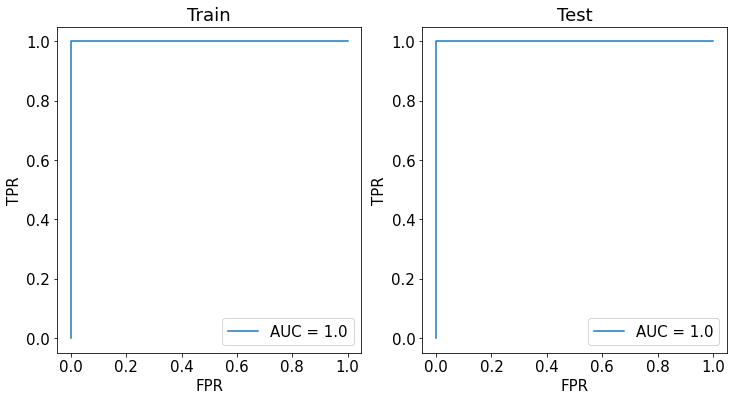

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Train')
x_fpr, y_tpr = roc_curve(X_train, w_optimal_1, y_train)
auc = integrate(y_tpr, x_fpr)
ax1.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend()

ax2.set_title('Test')
x_fpr, y_tpr = roc_curve(X_test, w_optimal_1, y_test)
auc = integrate(y_tpr, x_fpr)
ax2.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.legend()

plt.show()

In [ ]:
mask2 = y != 2
X = X_norm[mask2]
X = add_ones(X)
_y = y[mask2]
_y[_y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, _y, test_size=0.2, random_state=42)

w_optimal_2, _, _ = gradient_descent(w0, n_steps=10000, alpha=0.01)

100%|██████████| 10000/10000 [00:02<00:00, 3910.50it/s]


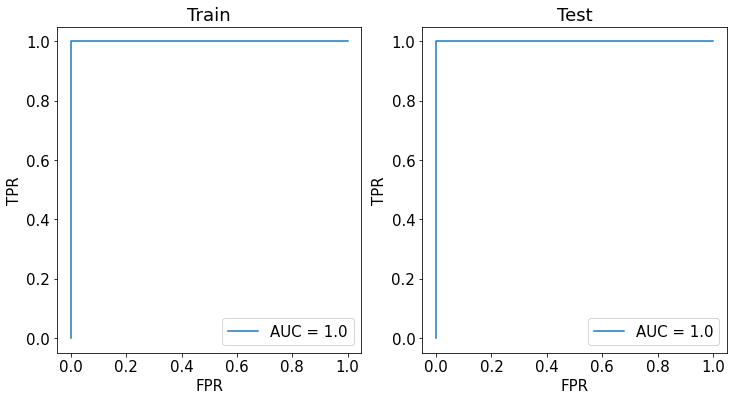

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Train')
x_fpr, y_tpr = roc_curve(X_train, w_optimal_2, y_train)
auc = integrate(y_tpr, x_fpr)
ax1.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend()

ax2.set_title('Test')
x_fpr, y_tpr = roc_curve(X_test, w_optimal_2, y_test)
auc = integrate(y_tpr, x_fpr)
ax2.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.legend()

plt.show()

In [ ]:
X = add_ones(X_norm)
res = np.stack((p(X, w_optimal_0), p(X, w_optimal_1), p(X, w_optimal_2))).T
print(res)

[[0.96254618 0.04926584 0.08281977]
 [0.96225748 0.07440355 0.14020061]
 [0.96533702 0.05151891 0.09197424]
 [0.96394123 0.06102634 0.11251086]
 [0.96365333 0.04209433 0.06868142]
 [0.94518679 0.05821363 0.0899349 ]
 [0.960573   0.04772352 0.08085769]
 [0.96200435 0.05505026 0.09522982]
 [0.96557779 0.06379359 0.12213644]
 [0.96680063 0.06295788 0.11739282]
 [0.95996775 0.04962847 0.08036271]
 [0.96259315 0.05262022 0.0910713 ]
 [0.96797016 0.06251645 0.11852825]
 [0.97319774 0.04031909 0.07440199]
 [0.96086731 0.03737615 0.05535851]
 [0.94716569 0.03583492 0.04799028]
 [0.95033183 0.04596106 0.06919617]
 [0.95679154 0.05582012 0.0934667 ]
 [0.94897134 0.06656949 0.10677119]
 [0.95696176 0.04330042 0.06737656]
 [0.95668986 0.07598409 0.13374521]
 [0.94991776 0.05449106 0.08684296]
 [0.96970713 0.02674908 0.0417822 ]
 [0.93712226 0.10358944 0.1811283 ]
 [0.95968108 0.06275766 0.11035508]
 [0.95951059 0.08776014 0.16643788]
 [0.94822578 0.07467982 0.12842126]
 [0.96081019 0.05506108 0.09

In [ ]:
prob = np.zeros(res.shape)
prob[:, 0] = res[:, 0]

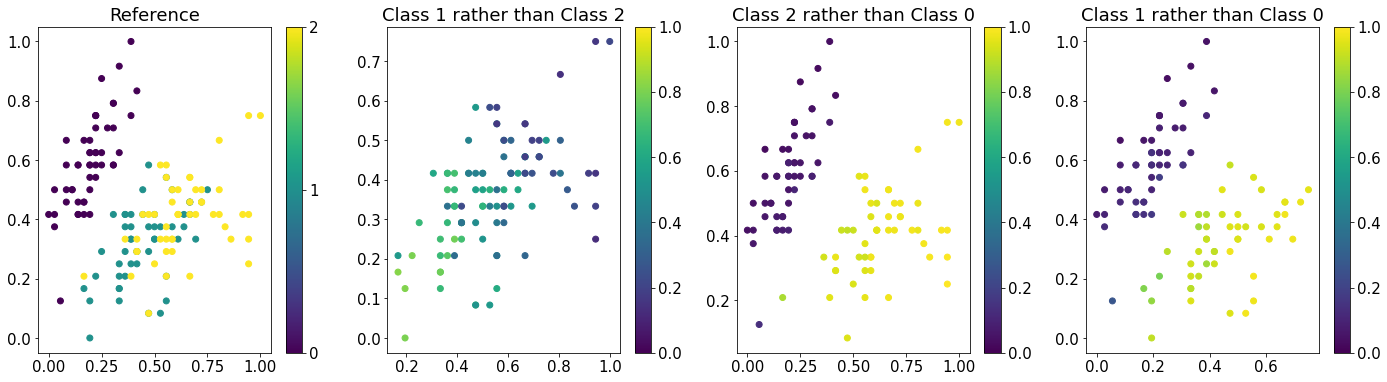

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

ax1.set_title('Reference')
sc1 = ax1.scatter(X[:, 0], X[:, 1], c=y, marker='o')
fig.colorbar(sc1, ax=ax1, ticks=[0, 1, 2])

ax2.set_title('Class 1 rather than Class 2')
sc2 = ax2.scatter(X[mask0][:, 0], X[mask0][:, 1], c=p(X[mask0], w_optimal_0), marker='o', vmin=0, vmax=1)
fig.colorbar(sc2, ax=ax2)

ax3.set_title('Class 2 rather than Class 0')
sc3 = ax3.scatter(X[mask1][:, 0], X[mask1][:, 1], c=p(X[mask1], w_optimal_1), marker='o', vmin=0, vmax=1)
fig.colorbar(sc3, ax=ax3)

ax4.set_title('Class 1 rather than Class 0')
sc4 = ax4.scatter(X[mask2][:, 0], X[mask2][:, 1], c=p(X[mask2], w_optimal_2), marker='o', vmin=0, vmax=1)
fig.colorbar(sc4, ax=ax4)

## 1 vs rest

In [ ]:
# y = 0 vs rest
X = X_norm
X = add_ones(X)
_y = deepcopy(y)
_y[_y == 1] = -1
_y[_y == 2] = -1
_y[_y == 0] = 1

X_train, X_test, y_train, y_test = train_test_split(X, _y, test_size=0.2, random_state=42)

w_optimal_0, _, _ = gradient_descent(w0, n_steps=10000, alpha=0.01)

100%|██████████| 10000/10000 [00:01<00:00, 5431.57it/s]


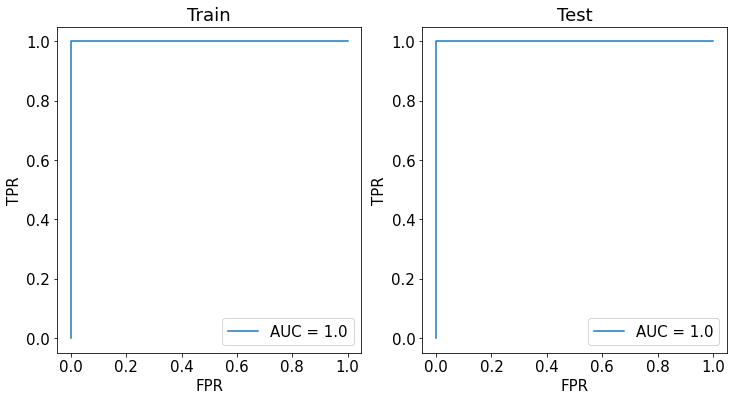

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Train')
x_fpr, y_tpr = roc_curve(X_train, w_optimal_0, y_train)
auc = integrate(y_tpr, x_fpr)
ax1.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend()

ax2.set_title('Test')
x_fpr, y_tpr = roc_curve(X_test, w_optimal_0, y_test)
auc = integrate(y_tpr, x_fpr)
ax2.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.legend()

plt.show()

In [ ]:
# y = 1 vs rest
X = X_norm
X = add_ones(X)
_y = deepcopy(y)
_y[_y == 1] = 1
_y[_y == 2] = -1
_y[_y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, _y, test_size=0.2, random_state=42)

w_optimal_1, _, _ = gradient_descent(w0, n_steps=10000, alpha=0.01)

100%|██████████| 10000/10000 [00:07<00:00, 1376.92it/s]


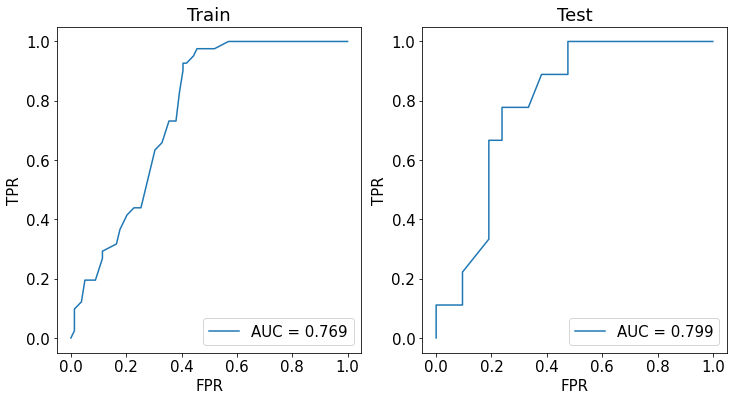

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Train')
x_fpr, y_tpr = roc_curve(X_train, w_optimal_1, y_train)
auc = integrate(y_tpr, x_fpr)
ax1.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend()

ax2.set_title('Test')
x_fpr, y_tpr = roc_curve(X_test, w_optimal_1, y_test)
auc = integrate(y_tpr, x_fpr)
ax2.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.legend()

plt.show()

In [ ]:
# y = 2 vs rest
X = X_norm
X = add_ones(X)
_y = deepcopy(y)
_y[_y == 1] = -1
_y[_y == 2] = 1
_y[_y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, _y, test_size=0.2, random_state=42)

w_optimal_1, _, _ = gradient_descent(w0, n_steps=10000, alpha=0.01)

100%|██████████| 10000/10000 [00:03<00:00, 2667.51it/s]


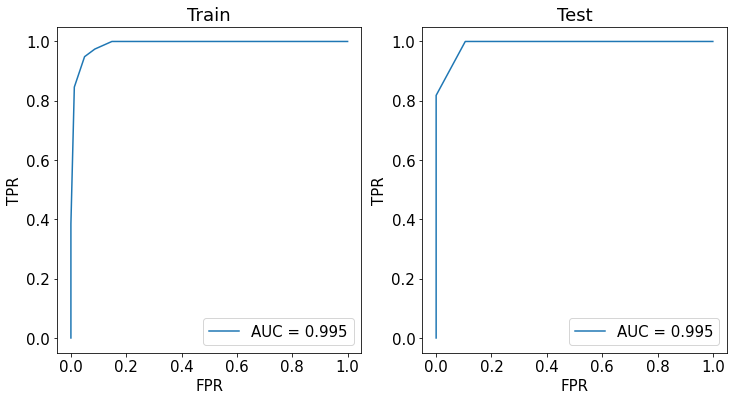

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Train')
x_fpr, y_tpr = roc_curve(X_train, w_optimal_2, y_train)
auc = integrate(y_tpr, x_fpr)
ax1.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.legend()

ax2.set_title('Test')
x_fpr, y_tpr = roc_curve(X_test, w_optimal_2, y_test)
auc = integrate(y_tpr, x_fpr)
ax2.plot(x_fpr, y_tpr, label=f'AUC = {np.round(auc, 3)}')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
ax2.legend()

plt.show()

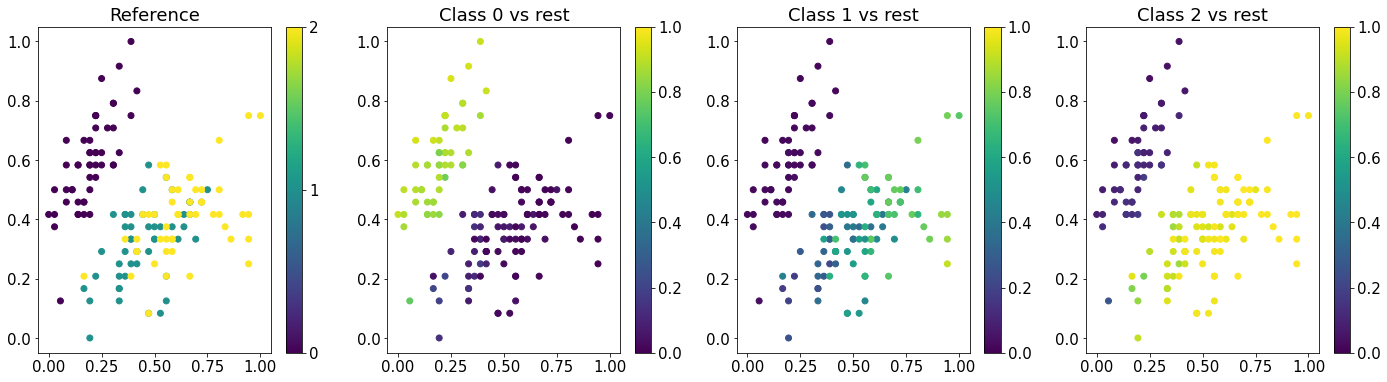

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))

ax1.set_title('Reference')
sc1 = ax1.scatter(X[:, 0], X[:, 1], c=y, marker='o')
fig.colorbar(sc1, ax=ax1, ticks=[0, 1, 2])

ax2.set_title('Class 0 vs rest')
sc2 = ax2.scatter(X[:, 0], X[:, 1], c=p(X, w_optimal_0), marker='o', vmin=0, vmax=1)
fig.colorbar(sc2, ax=ax2)

ax3.set_title('Class 1 vs rest')
sc3 = ax3.scatter(X[:, 0], X[:, 1], c=p(X, w_optimal_1), marker='o', vmin=0, vmax=1)
fig.colorbar(sc3, ax=ax3)

ax4.set_title('Class 2 vs rest')
sc4 = ax4.scatter(X[:, 0], X[:, 1], c=p(X, w_optimal_2), marker='o', vmin=0, vmax=1)
fig.colorbar(sc4, ax=ax4)